#**FBxM Data Retrieval - Processing SERPI**

-----
-----
-----

v0.3a (update 28012024) -- prototype -- Python 3.10.12
<br>
https://github.com/is004/FBxM.git

In [1]:
sampledatapath = 'https://github.com/is004/FBxM/blob/65ab3f2015b5d610c49e7eab28b5faabf3229e6c/DATASET/SERP1_After_2023-09-30_Before_2023-11-03.csv?raw=true'
# Data collection notes:
# GSE settings: Results language: Bahasa Indonesia; Display language: English
# Search URL: https://www.google.com/search?q=%E2%80%9Cuniversitas+kristen+maranatha%E2%80%9D+OR+%22universitas+maranatha%22+OR+%22uk+maranatha%22++-site%3A*.maranatha.edu+%E2%80%A8-site%3Akemdikbud.go.id+-site%3Alinkedin.com+-site%3Atwitter.com+-site%3Ainstagram.com+-site%3Alldikti4.or.id+-site%3Ayoutube.com+-site%3Afacebook.com++-site%3Atiktok.com+%E2%80%A8-site%3Aolx.co.id+-site%3Aslideshare.net+-site%3Arumah123.com+-site%3Atiket.com+-site%3Aexpedia.co.id+-site%3Atraveloka.com++-site%3Awikipedia.org+%E2%80%A8-intitle%3Adownload+-intitle%3Aindex+-intitle%3Aarchives+-intitle%3Ahotel+after%3A2023-06-30+before%3A2023-11-03

In [108]:
!python --version

Python 3.10.12


In [2]:
import pandas as pd

In [5]:
pd.options.display.max_colwidth = 200
#pd.options.display.max_rows = 200

#A. DATA RETRIEVAL & PREPROCESSING
-----
-----

In [3]:
dataread = pd.read_csv(sampledatapath)

In [7]:
dataread.head()

,Position,Organic Position,Searchquery,Device,Title,Description,Pixeldistance from top,Snippet Pixel Height,URL,domain,...,URL Preview,Custom Favicon,Title truncated,Description truncated,Has sitelinks,Has rich results,Has image,location,date,time
0,1,-,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,SERP Feature | Videos,-,187,387,-,-,...,-,-,-,-,-,-,-,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,14:06
1,2,1,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,"Isi Kuliah Umum di Universitas Kristen Maranatha, Ganjar ...","Oct 11, 2023 — Bacapres 2024, Ganjar Pranowo kembali mengisi kuliah umum di perguruan tinggi Kota Bandung, Rabu (11/10/2023) di Universitas Kristen Maranatha.",620,139,https://jabar.tribunnews.com/2023/10/11/isi-kuliah-umum-di-universitas-kristen-maranatha-ganjar-minta-perempuan-tidak-menikah-dini,jabar.tribunnews.com,...,https://jabar.tribunnews.com › ... › Pilpres,yes,TRUE,FALSE,FALSE,FALSE,TRUE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,14:06
2,3,2,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,Ganjar Pranowo Jelaskan Program Gaspol di Hadapan ...,"Oct 15, 2023 — Ganjar Pranowo Jelaskan Program Gaspol di Hadapan Mahasiswa Universitas Maranatha ... Universitas Kristen Maranatha, Bandung, Jawa Barat, Rabu (11/10/2023). Foto ...",789,139,https://nasional.sindonews.com/read/1226427/12/ganjar-pranowo-jelaskan-program-gaspol-di-hadapan-mahasiswa-universitas-maranatha-1697357425,nasional.sindonews.com,...,https://nasional.sindonews.com › read,yes,TRUE,TRUE,FALSE,FALSE,TRUE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,14:06
3,4,3,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,"Kunjungi Universitas Kristen Maranatha, Ganjar Pranowo ...","Oct 11, 2023 — Bakal calon presiden (Bacapres) 2024, Ganjar Pranowo mengenalkan program Gaspol saat mengisi kuliah umum di Universitas Kristen Maranatha bertajuk ...",958,117,https://daerah.sindonews.com/read/1223363/701/kunjungi-universitas-kristen-maranatha-ganjar-pranowo-kenalkan-program-gaspol-1697015407,daerah.sindonews.com,...,https://daerah.sindonews.com › read,yes,TRUE,TRUE,FALSE,FALSE,FALSE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,14:06
4,5,4,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,"Isi Kuliah Umum Universitas Maranatha, Ganjar Ingatkan ...","Oct 11, 2023 — ... Universitas Kristen Maranatha. BACA JUGA: Ini 3 Faktor yang Membuat Ganjar ... Universitas Maranatha · #Pemilu 2024. Video Rekomendasi. TPST Bantargebang ...",1105,139,https://news.okezone.com/read/2023/10/11/525/2899320/isi-kuliah-umum-universitas-maranatha-ganjar-ingatkan-perempuan-tak-menikah-dini,news.okezone.com,...,https://news.okezone.com › read › i...,yes,TRUE,TRUE,FALSE,FALSE,TRUE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,14:06


#Filtering menghapus dokumen tidak relevan
Dokumen tidak relevan dihasilkan dari pencarian yang tidak dapat difilter melalui search query (dikarenakan Google membatasi search query maksimal 32 kata), juga untuk menghapus hasil SERP tanpa deskripsi. Deteksi dari kolom 'domain' dan 'Description'.

In [8]:
hapusdomain = ['apps.apple.com', 'cakeresume.com', 'researchgate.net', 'journal.', 'jurnal.', 'ojs.', 'ejournal.',
               'play.google.com', 'onesearch.id', 'arthaproperty.id', 'tokopedia.com', 'reddoorz.com', 'raywhite.co.id',
               'google.com', 'rsukm.com', 'ascee.org', 'lazada.co.id', 'studocu.com', 'buatcvonline.com', 'jurnalnasional.ump.ac.id']
#List domain yang tidak relevan dengan jenis monitoring yang dilakukan

dataread_filtered = dataread[dataread['domain'].str.contains('|'.join(hapusdomain)) == False].drop_duplicates()
#Hapus rows yang mengandung partial string list domain tidak relevan dari kolom 'domain', hapus row yang duplikat (bila ada)

dataread_filtered = dataread_filtered[dataread_filtered['Description'] != '-']
dataread_filtered = dataread_filtered[dataread_filtered['Description'] != 'none']
dataread_filtered = dataread_filtered[dataread_filtered['domain'] != '-']
dataread_filtered = dataread_filtered[dataread_filtered['domain'] != 'none']
# Drop rows bila kolom 'Description' atau 'domain' kosong (bila ada)

In [10]:
dataread_filtered.head()

,Position,Organic Position,Searchquery,Device,Title,Description,Pixeldistance from top,Snippet Pixel Height,URL,domain,...,URL Preview,Custom Favicon,Title truncated,Description truncated,Has sitelinks,Has rich results,Has image,location,date,time
1,2,1,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,"Isi Kuliah Umum di Universitas Kristen Maranatha, Ganjar ...","Oct 11, 2023 — Bacapres 2024, Ganjar Pranowo kembali mengisi kuliah umum di perguruan tinggi Kota Bandung, Rabu (11/10/2023) di Universitas Kristen Maranatha.",620,139,https://jabar.tribunnews.com/2023/10/11/isi-kuliah-umum-di-universitas-kristen-maranatha-ganjar-minta-perempuan-tidak-menikah-dini,jabar.tribunnews.com,...,https://jabar.tribunnews.com › ... › Pilpres,yes,TRUE,FALSE,FALSE,FALSE,TRUE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,14:06
2,3,2,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,Ganjar Pranowo Jelaskan Program Gaspol di Hadapan ...,"Oct 15, 2023 — Ganjar Pranowo Jelaskan Program Gaspol di Hadapan Mahasiswa Universitas Maranatha ... Universitas Kristen Maranatha, Bandung, Jawa Barat, Rabu (11/10/2023). Foto ...",789,139,https://nasional.sindonews.com/read/1226427/12/ganjar-pranowo-jelaskan-program-gaspol-di-hadapan-mahasiswa-universitas-maranatha-1697357425,nasional.sindonews.com,...,https://nasional.sindonews.com › read,yes,TRUE,TRUE,FALSE,FALSE,TRUE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,14:06
3,4,3,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,"Kunjungi Universitas Kristen Maranatha, Ganjar Pranowo ...","Oct 11, 2023 — Bakal calon presiden (Bacapres) 2024, Ganjar Pranowo mengenalkan program Gaspol saat mengisi kuliah umum di Universitas Kristen Maranatha bertajuk ...",958,117,https://daerah.sindonews.com/read/1223363/701/kunjungi-universitas-kristen-maranatha-ganjar-pranowo-kenalkan-program-gaspol-1697015407,daerah.sindonews.com,...,https://daerah.sindonews.com › read,yes,TRUE,TRUE,FALSE,FALSE,FALSE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,14:06
4,5,4,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,"Isi Kuliah Umum Universitas Maranatha, Ganjar Ingatkan ...","Oct 11, 2023 — ... Universitas Kristen Maranatha. BACA JUGA: Ini 3 Faktor yang Membuat Ganjar ... Universitas Maranatha · #Pemilu 2024. Video Rekomendasi. TPST Bantargebang ...",1105,139,https://news.okezone.com/read/2023/10/11/525/2899320/isi-kuliah-umum-universitas-maranatha-ganjar-ingatkan-perempuan-tak-menikah-dini,news.okezone.com,...,https://news.okezone.com › read › i...,yes,TRUE,TRUE,FALSE,FALSE,TRUE,"Indonesia Sukasari, Bandung City, West Java",11/3/2023,14:06
5,6,5,"“universitas kristen maranatha” OR ""universitas maranatha"" OR ""uk maranatha"" -site:*.maranatha.edu -site:kemdikbud.go.id -site:linkedin.com -site:twitter.com -site:instagram.com -site:lldikti4.or....",desktop,Terima Kasih Universitas Maranatha ...,"20 hours ago — Terima Kasih Universitas Maranatha, Terima Kasih Universitas Parahyangan - Karya Wisata Episode 2. ... Universitas Kristen Maranatha. Beliau memaparakan kegiatan ...",1273,139,https://bpkpenabur.or.id/tangerang/smak-penabur-gading-serpong/berita/berita-bpk-penabur-jakarta/terima-kasih-universitas-maranatha-terima-kasih-universitas-parahyangan-karya-wisata-episode-2,bpkpenabur.or.id,...,https://bpkpenabur.or.id › berita › t...,yes,TRUE,TRUE,FALSE,FALSE,TRUE,"In

In [11]:
dataserp = dataread_filtered['Title'] + ' - ' + dataread_filtered['Description']
# Seleksi ambil hanya kolom Title dan Description (gabungkan)

In [12]:
dataserp.head(30)

1     Isi Kuliah Umum di Universitas Kristen Maranatha, Ganjar ... - Oct 11, 2023 — Bacapres 2024, Ganjar Pranowo kembali mengisi kuliah umum di perguruan tinggi Kota Bandung, Rabu (11/10/2023) di Unive...
2     Ganjar Pranowo Jelaskan Program Gaspol di Hadapan ... - Oct 15, 2023 — Ganjar Pranowo Jelaskan Program Gaspol di Hadapan Mahasiswa Universitas Maranatha ... Universitas Kristen Maranatha, Bandung,...
3     Kunjungi Universitas Kristen Maranatha, Ganjar Pranowo ... - Oct 11, 2023 — Bakal calon presiden (Bacapres) 2024, Ganjar Pranowo mengenalkan program Gaspol saat mengisi kuliah umum di Universitas ...
4     Isi Kuliah Umum Universitas Maranatha, Ganjar Ingatkan ... - Oct 11, 2023 — ... Universitas Kristen Maranatha. BACA JUGA: Ini 3 Faktor yang Membuat Ganjar ... Universitas Maranatha · #Pemilu 2024....
5     Terima Kasih Universitas Maranatha ... - 20 hours ago — Terima Kasih Universitas Maranatha, Terima Kasih Universitas Parahyangan - Karya Wisata Episode 2. ... Universitas

Catatan: Masih ada banyak noise: teks tanggal dan bulan, days ago, label menu (share: tags: related news:). Perlu dicleaning dengan pengolahan string pada dataframe dan selanjutnya dengan cara menambah dictionary stopwords spesifik. Noise ini adalah noise yang khas dan akan selalu ada di hasil SERP secara umum. Cleaning juga diperlukan untuk filtering lanjutan menghapus dokumen yang tidak relevan (misalnya dari situs jurnal ilmiah dan e-commerce) yang tidak dapat difilter pada tahap awal.

#EDA: lihat sumber dokumen
Menampilkan daftar media pada SERP setelah filtering

In [13]:
datamedia = dataread_filtered['domain']

In [14]:
print(datamedia.to_string())

1                     jabar.tribunnews.com
2                   nasional.sindonews.com
3                     daerah.sindonews.com
4                         news.okezone.com
5                         bpkpenabur.or.id
6                           jabar.inews.id
7                     bandungraya.inews.id
8                           www.viva.co.id
9                            moovitapp.com
10                     www.widyatama.ac.id
12                    www.smkn1-cmi.sch.id
13                           www.gesuri.id
14            www.demoweb.dutawacana.ac.id
15                    saac.nusaputra.ac.id
16                     www.metrotvnews.com
17                     www.satuharapan.com
18                            suarabaru.id
20                        www.liputan6.com
21                     seminar.unmer.ac.id
23                         www.jawapos.com
24                           www.detik.com
26     www.smaslametriyadi-karawang.sch.id
27                         halosemarang.id
29         

#EDA: lihat frekuensi kata

In [15]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Plot most frequent term (dari list string)
def freq_words(x, terms):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # Select top n most frequent words
  d = words_df.nlargest(columns = "count", n = terms)
  plt.figure(figsize = (20,5))
  plt.rcParams['font.size'] = 12
  locs, labels = plt.xticks()
  plt.setp(labels, rotation = 90)
  ax = sns.barplot(data = d, x = "word", y = "count", hue = "word")
  ax.set(ylabel = 'Term Counts')
  ax.set(xlabel = 'Top Terms')
  plt.show()

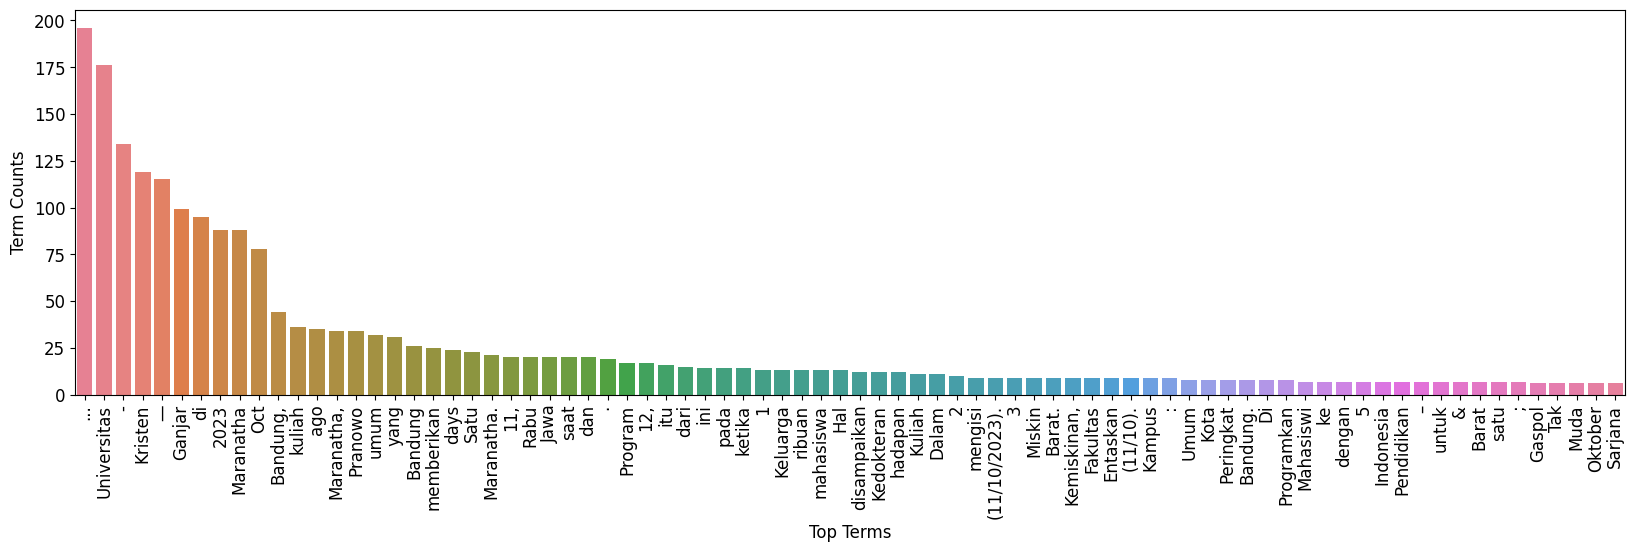

In [ ]:
# Lihat frekuensi kata
freq_words(dataserp, terms=80)

#Precleaning
Cleaning pada level dataset mentah setelah filtering

In [16]:
hapuskata = ['Berita Resmi Universitas', 'Archive - Maranatha News', 'Archives - Maranatha News', 'Popular News - Maranatha News', 'Contact - Maranatha News',
             'Popular News', 'Popular Tags', 'Editor Pick', 'Untitled', 'Universitas Kristen Maranatha Archives',
             'Archive - Page', 'Archives - Page', 'Kata Kunci - Maranatha News', 'Hasil Pencarian', 'Related Photo', 'More News', 'SERP Feature',
             'Download', 'Unduh']
# List daftar kata berisi string tags navigasi dan penanda khas yang tidak berkontribusi makna pada pemodelan topik
# "SERP Feature" digenerate oleh Google Search Engine, yaitu hasil tambahan yang tidak dibutuhkan pada pemodelan topik

dataserp_preclean = dataserp[~dataserp.str.contains('|'.join(hapuskata))].reset_index(drop=True)
# Drop rows series mengandung partial string list [hapuskata] pada kolom 'Title'; dan reset index

In [17]:
dataserp_preclean.shape

(112,)

In [18]:
dataserp_preclean.head(30)

0     Isi Kuliah Umum di Universitas Kristen Maranatha, Ganjar ... - Oct 11, 2023 — Bacapres 2024, Ganjar Pranowo kembali mengisi kuliah umum di perguruan tinggi Kota Bandung, Rabu (11/10/2023) di Unive...
1     Ganjar Pranowo Jelaskan Program Gaspol di Hadapan ... - Oct 15, 2023 — Ganjar Pranowo Jelaskan Program Gaspol di Hadapan Mahasiswa Universitas Maranatha ... Universitas Kristen Maranatha, Bandung,...
2     Kunjungi Universitas Kristen Maranatha, Ganjar Pranowo ... - Oct 11, 2023 — Bakal calon presiden (Bacapres) 2024, Ganjar Pranowo mengenalkan program Gaspol saat mengisi kuliah umum di Universitas ...
3     Isi Kuliah Umum Universitas Maranatha, Ganjar Ingatkan ... - Oct 11, 2023 — ... Universitas Kristen Maranatha. BACA JUGA: Ini 3 Faktor yang Membuat Ganjar ... Universitas Maranatha · #Pemilu 2024....
4     Terima Kasih Universitas Maranatha ... - 20 hours ago — Terima Kasih Universitas Maranatha, Terima Kasih Universitas Parahyangan - Karya Wisata Episode 2. ... Universitas

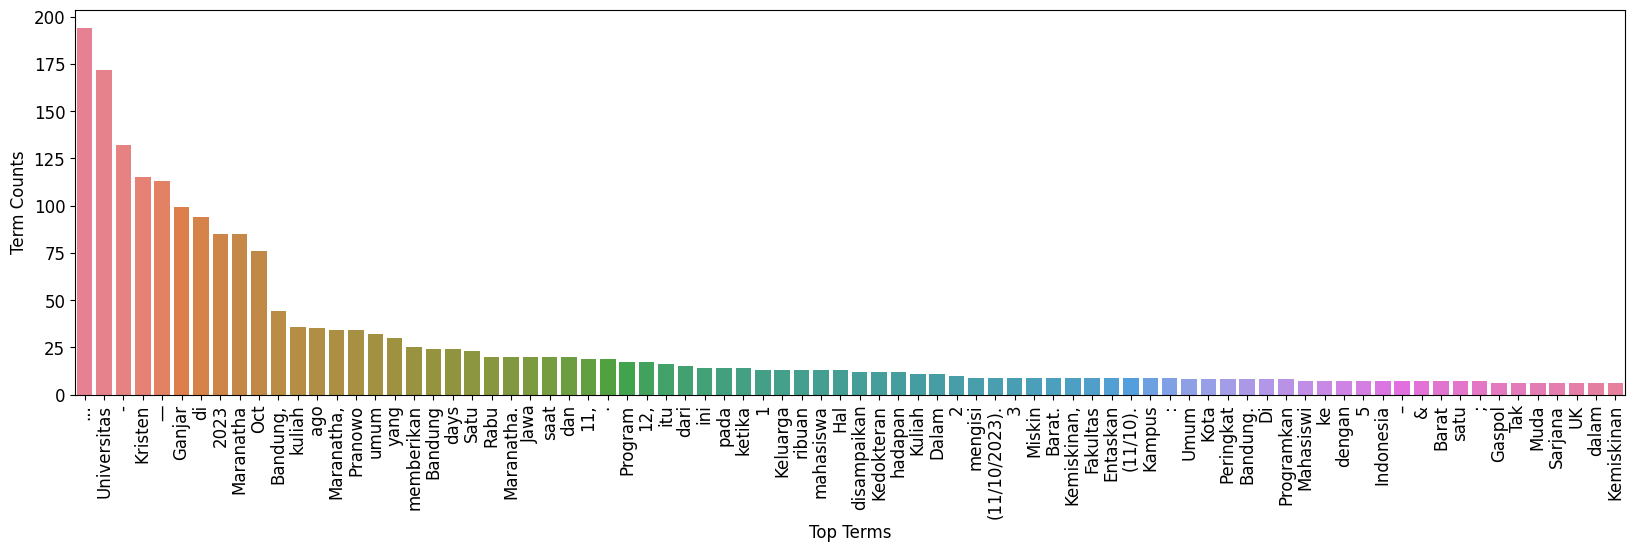

In [ ]:
# Lihat frekuensi kata
freq_words(dataserp_preclean, terms=80)

#Preprocessing & cleaning tahap I

Cleaning berikutnya (setelah cleaning stopwords) untuk menghapus row yang berisi pola informasi jurnal ilmiah. Dihapus karena proses monitoring pada kebutuhan ini tidak difokuskan pada topik-topik ilmiah, melainkan pada topik umum nonilmiah.
<br><br>
Cara menghapus dengan mendeteksi row berisi pola kata 'volume nomor', 'vol no', 'volume no', 'vol nomor', 'tahun nomor', 'tahun no', 'author index', 'abstract', 'doi', 'issn', 'author details', 'editorial team'. Seluruh frase ini mengindikasikan SERP yang mengacu jurnal ilmiah. Sedangkan pembicaraan umum nonilmiah cenderung tidak menggunakan istilah-istilah teknis tersebut saat mengacu ke karya ilmiah atau menyebut jurnal secara umum (bukan dalam konteks pembicaraan ilmiah).

In [ ]:
# import nltk, regular expression
nltk.download('stopwords') # Stopwords dictionary files
nltk.download('punkt') # Tokenizer
from nltk import word_tokenize, sent_tokenize # Tokenisasi
from nltk.corpus import stopwords
import re, string, unicodedata  # Regular expression

In [21]:
# Cleaning remove punctuation, number, karakter khusus, lowercasing, dst.
def cleaning(str):
    # remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    # remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    # remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    # remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    # lowercasing
    str = str.lower()
    # Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    return str

# Remove short sentence which contains only n word or less
def removeShortSentence(str):
    n = 5
    word = str.split()
    wordCount = len(word)
    if(wordCount <= n):
        str = ''
    return str

# Remove word which contains only 2 letter
# Untuk menghapus singkatan nama dan gelar 2 huruf (gelar 3 huruf tidak dihapus karena bisa menghapus kata bermakna)
def removeWord(str, threshold = 2):
    threshold = threshold
    words = word_tokenize(str)
    str = ' '.join([w for w in words if len(w) > threshold])
    return str

# Remove stopword
def removeStopword(str):
    # stop_words = set(stopwords.words('indonesian')) # Syntax bila ingin menggunakan stopwords dictionary (file txt) custom -- ganti 'indonesian' dengan file custom
    stop_words = nltk.corpus.stopwords.words('indonesian') # Load dictionary bahasa Indonesia
    stop_words_2 = nltk.corpus.stopwords.words('english') # Load dictionary bahasa Inggris
    stop_words.extend(stop_words_2) # Gabungkan dictionary bahasa Inggis dan bahasa Indonesia
    # Menambahkan list custom stopwords (domain specific): kata-kata yang sering muncul tetapi tidak diperlukan sebagai topik
    custom_stopwords = ['day', 'days', 'ago', 'hours', 'hour', 'jan', 'feb', 'mar', 'apr', 'may', 'mei', 'jun', 'jul', 'aug', 'sep', 'sept', 'oct', 'okt', 'nov', 'dec', 'des',
                        'menit', 'bulan', 'januari', 'februari', 'maret', 'april', 'mei', 'juni', 'juli', 'agustus', 'september', 'oktober', 'november', 'desember',
                        'january', 'february', 'march', 'may', 'june', 'july', 'august', 'october', 'december',
                        'tanggal', 'hari', 'senin', 'selasa', 'rabu', 'kamis', 'jumat', 'sabtu', 'minggu',
                        'uk', 'universitas', 'kristen', 'maranatha', 'news', 'i', 'ii', 'iii', 'iv',
                        'mengadakan', 'adakan', 'menggelar', 'digelar', 'menyelenggarakan', 'selenggarakan', 'diselenggarakan',
                        'gedung', 'ruang', 'kampus', 'bertempat', 'kali', 'bandung', 'civitas', 'academica', 'segenap',
                        'tag', 'kumpulan', 'berita', 'terkini', 'com', 'articles', 'seputar', 'terbaru',
                        'share', 'none', 'admin', 'post', 'email', 'format', 'telp', 'telepon']
    stop_words.extend(custom_stopwords) # Gabungkan custom stopwords

    exclude_stopwords = ['sama', 'umum', 'besar', 'wong']
    # Exclude kata dari daftar kata default NLTK Indonesian dictionary (kata "sama" dibutuhkan untuk membentuk frase "kerja sama"; "besar" -- "guru besar"; "umum" -- "kuliah-umum")
    # Exclude "no" karena diperlukan untuk mendeteksi pola "vol no" pada proses cleaning berikutnya --- but 'no' sudah dihapus karena 2 letter
    final_stopwords = set([w for w in stop_words if w not in exclude_stopwords])

    # NB: Daftar kata stopwords yang ditambah dan dikurangi ditentukan berdasarkan EDA awal dan pengamatan hasil topik yang dihasilkan melalui eksperimen iterasi topic modeling

    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in final_stopwords]
    return ' '.join(filtered_sentence)

# All preprocessing chains
def preprocessing(str):
    str = cleaning(str)
    str = removeWord(str)
    str = removeStopword(str)
    str = removeShortSentence(str) # Hapus kalimat yang terdiri dari jumlah kata <= n setelah stopwords dihapus
    return str

In [22]:
dataserp_clean = dataserp_preclean.apply(preprocessing).drop_duplicates() # Hapus row series yang duplikat (bila ada)
dataserp_clean = dataserp_clean[dataserp_clean != ''].reset_index(drop=True) # Drop empty rows (bila ada)

In [ ]:
dataserp_clean.head(30)

0                                                                             isi kuliah umum ganjar bacapres ganjar pranowo mengisi kuliah umum perguruan kota
1                                                         ganjar pranowo program gaspol hadapan ganjar pranowo program gaspol hadapan mahasiswa jawa barat foto
2                                        kunjungi ganjar pranowo calon presiden bacapres ganjar pranowo mengenalkan program gaspol mengisi kuliah umum bertajuk
3                                                                 isi kuliah umum ganjar ingatkan baca faktor ganjar pemilu video rekomendasi tpst bantargebang
4                                                           terima kasih terima kasih terima kasih parahyangan karya wisata episode beliau memaparakan kegiatan
5                                                     isi kuliah umum ganjar serukan isi kuliah umum ganjar serukan perempuan nikah rektor prof sri widiyantoro
6                                       

In [23]:
dataserp_clean.shape

(109,)

#Cleaning tahap II
Cleaning setelah lowercasing & stopwords removal

In [24]:
hapuskata_2 = ['volume nomor', 'vol', 'volume no', 'authors', 'author index', 'abstract', 'doi', 'issn', 'author details', 'editorial team', 'journal', 'tugas pertemuan',
               'full text', 'lokasi strategis', 'jual rumah', 'jual tanah', 'cek harga produk', 'temukan harga', 'rating reviews', 'read', 'admin dibaca', 'dibaca post',
               'peer review', 'orcid', 'draft']
# List pola kata yang mengindikasikan artikel merujuk ke jurnal ilmiah dan dokumen tugas mahasiswa; pola kata situs jual beli, kos, dan yang tidak relevan lainnya

dataserp_clean = dataserp_clean[~dataserp_clean.str.contains('|'.join(hapuskata_2))].reset_index(drop=True)
# Drop rows series mengandung partial string list [hapuskata_2] pada kolom 'Title'; dan reset index

In [ ]:
dataserp_clean.head(30)

0                                                                             isi kuliah umum ganjar bacapres ganjar pranowo mengisi kuliah umum perguruan kota
1                                                         ganjar pranowo program gaspol hadapan ganjar pranowo program gaspol hadapan mahasiswa jawa barat foto
2                                        kunjungi ganjar pranowo calon presiden bacapres ganjar pranowo mengenalkan program gaspol mengisi kuliah umum bertajuk
3                                                                 isi kuliah umum ganjar ingatkan baca faktor ganjar pemilu video rekomendasi tpst bantargebang
4                                                           terima kasih terima kasih terima kasih parahyangan karya wisata episode beliau memaparakan kegiatan
5                                                     isi kuliah umum ganjar serukan isi kuliah umum ganjar serukan perempuan nikah rektor prof sri widiyantoro
6                                       

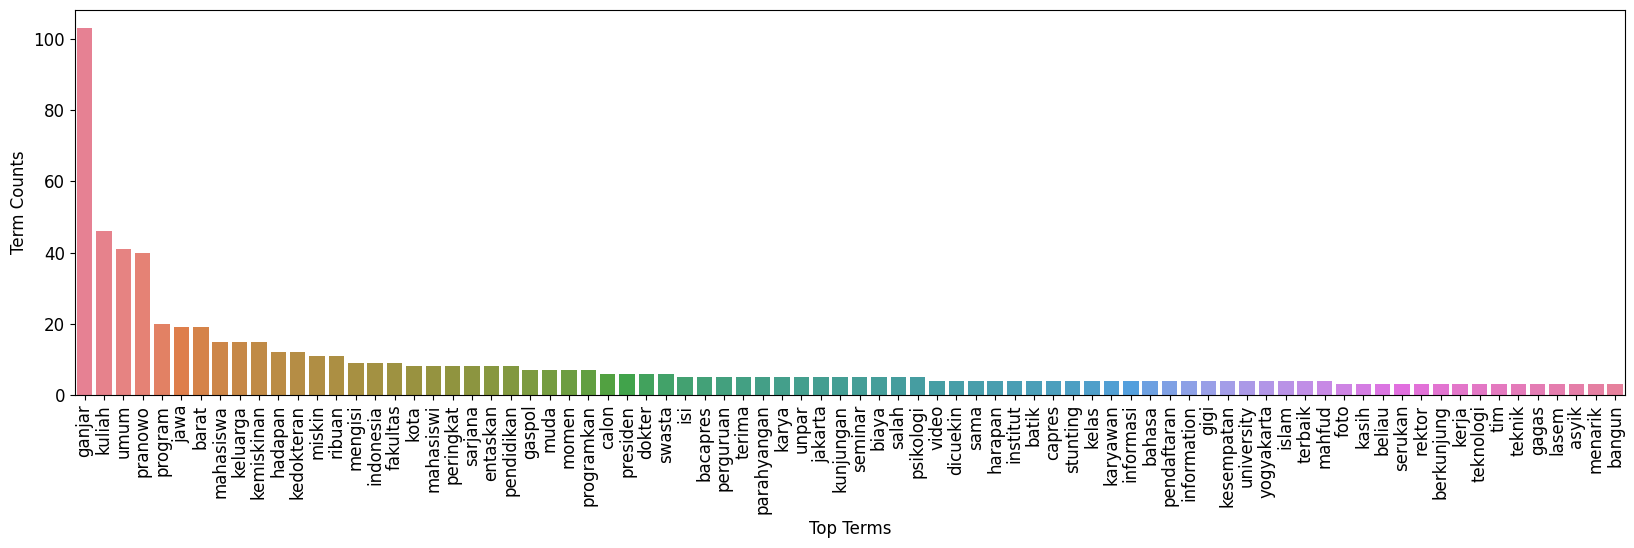

In [ ]:
# Lihat frekuensi kata
freq_words(dataserp_clean, terms=80)

In [ ]:
dataserp_clean.shape

(104,)

#Text list unigram

In [25]:
# Split sentences menjadi list of text
text_list =  [i.split() for i in dataserp_clean]

In [26]:
text_list[0:3]

[['isi',
  'kuliah',
  'umum',
  'ganjar',
  'bacapres',
  'ganjar',
  'pranowo',
  'mengisi',
  'kuliah',
  'umum',
  'perguruan',
  'kota'],
 ['ganjar',
  'pranowo',
  'program',
  'gaspol',
  'hadapan',
  'ganjar',
  'pranowo',
  'program',
  'gaspol',
  'hadapan',
  'mahasiswa',
  'jawa',
  'barat',
  'foto'],
 ['kunjungi',
  'ganjar',
  'pranowo',
  'calon',
  'presiden',
  'bacapres',
  'ganjar',
  'pranowo',
  'mengenalkan',
  'program',
  'gaspol',
  'mengisi',
  'kuliah',
  'umum',
  'bertajuk']]

In [27]:
# Hitung jumlah teks dalam list of list
def get_all_elements(list):
    count = 0
    for element in list:
        count += len(element)
    return count

In [28]:
print("Total number of elements in text list unigram: ", get_all_elements(text_list))

Total number of elements in text list unigram:  1449


#Checkpoint: save corpus unigram

In [29]:
import pickle

In [31]:
#Save list to pickle
pklpath = 'DATASAVE/SERP1_corpus_unigram.pkl'
savedata = text_list
with open(pklpath, 'wb') as f:
  pickle.dump(savedata, f)

In [ ]:
#Load list from pickle
pklpath = 'DATASAVE/SERP1_corpus_unigram.pkl'
with open(pklpath, 'rb') as f:
  text_list = pickle.load(f)

#Bigram & trigram

In [32]:
import gensim
from gensim.models import Phrases # Bigram & trigram model

In [33]:
# Build the bigram and trigram models (high threshold)
bigram_high = gensim.models.Phrases(text_list, min_count=2, threshold=40)
trigram_high = gensim.models.Phrases(bigram_high[text_list], min_count=1, threshold=200)
# Min_count = minimal appear in document; higher threshold fewer phrases
# Parameter min_count dan threshold ditentukan berdasarkan pengamatan bigram & trigram yang berhasil terbentuk (make sense) melalui iterasi eksperimen (parameter paling loose sampai paling tight)

# Form bigrams & trigrams
def make_bigrams(texts):
    return [bigram_high[doc] for doc in texts]
def make_trigrams(texts):
    return [trigram_high[bigram_high[doc]] for doc in texts]

In [34]:
text_list_trigrams_high = make_trigrams(text_list)

In [36]:
text_list_trigrams_high[0:3]

[['isi',
  'kuliah',
  'umum',
  'ganjar',
  'bacapres',
  'ganjar',
  'pranowo',
  'mengisi',
  'kuliah',
  'umum',
  'perguruan',
  'kota'],
 ['ganjar',
  'pranowo',
  'program_gaspol',
  'hadapan',
  'ganjar',
  'pranowo',
  'program_gaspol',
  'hadapan',
  'mahasiswa',
  'jawa_barat',
  'foto'],
 ['kunjungi',
  'ganjar',
  'pranowo',
  'calon_presiden',
  'bacapres',
  'ganjar',
  'pranowo',
  'mengenalkan',
  'program_gaspol',
  'mengisi',
  'kuliah',
  'umum',
  'bertajuk']]

In [37]:
print("Total number of elements in text list trigram: ", get_all_elements(text_list_trigrams_high))

Total number of elements in text list trigram:  1301


#Checkpoint: save corpus trigram

In [38]:
#Save list to pickle
pklpath = 'DATASAVE/SERP1_corpus_trigram.pkl'
savedata = text_list_trigrams_high
with open(pklpath, 'wb') as f:
  pickle.dump(savedata, f)

In [ ]:
#Load list from pickle
pklpath = 'DATASAVE/SERP1_corpus_trigram.pkl'
with open(pklpath, 'rb') as f:
  text_list_trigrams_high = pickle.load(f)

#Lihat frekuensi kata trigram

In [ ]:
# Lihat frekuensi kata trigram (dari list token)
def freq_words_trigram(x, terms):
  all_words = pd.Series(x)
  all_words = all_words.explode()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # Select top n most frequent words
  d = words_df.nlargest(columns = "count", n = terms)
  plt.figure(figsize = (20,5))
  plt.rcParams['font.size'] = 12
  locs, labels = plt.xticks()
  plt.setp(labels, rotation=90)
  ax = sns.barplot(data = d, x = "word", y = "count", hue = "word")
  ax.set(ylabel = 'Term Counts')
  ax.set(xlabel = 'Top Terms')
  plt.show()

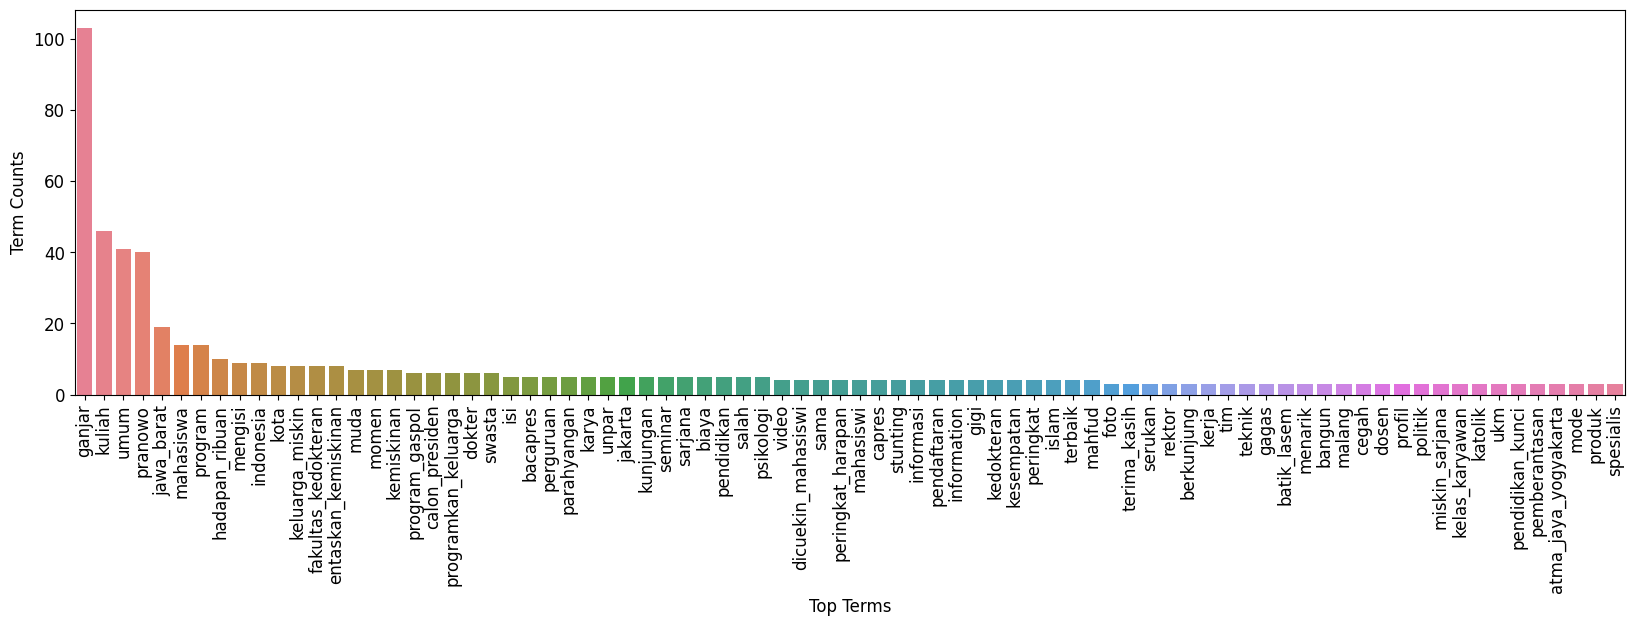

In [ ]:
freq_words_trigram(text_list_trigrams_high, terms=80)

-----

# Preprocessing tahap II unigram

Evaluation & low value filtering using TF-IDF pada corpus unigram

In [39]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import numpy as np

In [40]:
from warnings import filterwarnings # Suppress warnings
filterwarnings('ignore')

In [41]:
# Create dictionary & corpus
dictionary_unigram = Dictionary(text_list)
corpus_unigram = [dictionary_unigram.doc2bow(text) for text in text_list]

print(dictionary_unigram)
print(corpus_unigram)

Dictionary<677 unique tokens: ['bacapres', 'ganjar', 'isi', 'kota', 'kuliah']...>
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2)], [(1, 2), (7, 2), (9, 1), (10, 1), (11, 2), (12, 2), (13, 1), (14, 1), (15, 2)], [(0, 1), (1, 2), (4, 1), (5, 1), (7, 2), (8, 1), (11, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1)], [(1, 2), (2, 1), (4, 1), (8, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(29, 1), (30, 1), (31, 1), (32, 3), (33, 1), (34, 1), (35, 1), (36, 3), (37, 1)], [(1, 2), (2, 2), (4, 2), (8, 2), (38, 1), (39, 1), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1)], [(1, 2), (7, 1), (35, 1), (38, 1), (42, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(1, 2), (7, 2), (28, 1), (50, 1), (51, 1), (52, 2), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1)], [(3, 1), (59, 2), (60, 1), (61, 1), (62, 2), (63, 2), (64, 1), (65, 1), (66, 1)], [(67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (7

In [42]:
# Cek isi corpus
print("Total number of elements in corpus bow: ", get_all_elements(corpus_unigram))
limit = 5
for doc in corpus_unigram[0:limit]:
   print([[dictionary_unigram[id], freq] for id, freq in doc])

Total number of elements in corpus bow:  1274
[['bacapres', 1], ['ganjar', 2], ['isi', 1], ['kota', 1], ['kuliah', 2], ['mengisi', 1], ['perguruan', 1], ['pranowo', 1], ['umum', 2]]
[['ganjar', 2], ['pranowo', 2], ['barat', 1], ['foto', 1], ['gaspol', 2], ['hadapan', 2], ['jawa', 1], ['mahasiswa', 1], ['program', 2]]
[['bacapres', 1], ['ganjar', 2], ['kuliah', 1], ['mengisi', 1], ['pranowo', 2], ['umum', 1], ['gaspol', 1], ['program', 1], ['bertajuk', 1], ['calon', 1], ['kunjungi', 1], ['mengenalkan', 1], ['presiden', 1]]
[['ganjar', 2], ['isi', 1], ['kuliah', 1], ['umum', 1], ['baca', 1], ['bantargebang', 1], ['faktor', 1], ['ingatkan', 1], ['pemilu', 1], ['rekomendasi', 1], ['tpst', 1], ['video', 1]]
[['beliau', 1], ['episode', 1], ['karya', 1], ['kasih', 3], ['kegiatan', 1], ['memaparakan', 1], ['parahyangan', 1], ['terima', 3], ['wisata', 1]]


In [43]:
# Buat document terms matrix TF-IDF
tf_idf_unigram = TfidfModel(corpus_unigram, normalize = True, smartirs='ntc') # Fit TF-IDF model
tf_idf_corpus_unigram = tf_idf_unigram[corpus_unigram] # Apply TF-IDF model

In [44]:
# Lihat corpus tf-idf dan weight
print("Total number of elements in corpus tf_idf: ", get_all_elements(tf_idf_corpus_unigram))
limit = 5
for doc in tf_idf_corpus_unigram[0:limit]:
   print([[dictionary_unigram[id], np.around(freq, decimals=2)] for id, freq in doc])

Total number of elements in corpus tf_idf:  1274
[['bacapres', 0.41], ['ganjar', 0.19], ['isi', 0.45], ['kota', 0.37], ['kuliah', 0.25], ['mengisi', 0.33], ['perguruan', 0.41], ['pranowo', 0.17], ['umum', 0.28]]
[['ganjar', 0.14], ['pranowo', 0.25], ['barat', 0.17], ['foto', 0.35], ['gaspol', 0.6], ['hadapan', 0.45], ['jawa', 0.17], ['mahasiswa', 0.2], ['program', 0.36]]
[['bacapres', 0.29], ['ganjar', 0.13], ['kuliah', 0.09], ['mengisi', 0.23], ['pranowo', 0.24], ['umum', 0.1], ['gaspol', 0.29], ['program', 0.17], ['bertajuk', 0.44], ['calon', 0.27], ['kunjungi', 0.44], ['mengenalkan', 0.37], ['presiden', 0.27]]
[['ganjar', 0.11], ['isi', 0.25], ['kuliah', 0.07], ['umum', 0.08], ['baca', 0.31], ['bantargebang', 0.36], ['faktor', 0.36], ['ingatkan', 0.31], ['pemilu', 0.36], ['rekomendasi', 0.36], ['tpst', 0.36], ['video', 0.25]]
[['beliau', 0.17], ['episode', 0.23], ['karya', 0.16], ['kasih', 0.68], ['kegiatan', 0.19], ['memaparakan', 0.23], ['parahyangan', 0.16], ['terima', 0.52], ['w

#Visualisasi DTM Unigram

In [ ]:
list_of_dtm_unigram = []
for doc in tf_idf_corpus_unigram:
   list_of_dtm_unigram.append([[dictionary_unigram[id], np.around(freq, decimals=2)] for id, freq in doc])

#Plot 5 dokumen

In [ ]:
df_dtm_unigram_doc0 = pd.DataFrame(list_of_dtm_unigram[0], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc1 = pd.DataFrame(list_of_dtm_unigram[1], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc2 = pd.DataFrame(list_of_dtm_unigram[2], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc3 = pd.DataFrame(list_of_dtm_unigram[3], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc4 = pd.DataFrame(list_of_dtm_unigram[4], columns = ['terms', 'tf_idf'])
df_dtm_unigram_doc5 = pd.DataFrame(list_of_dtm_unigram[5], columns = ['terms', 'tf_idf'])

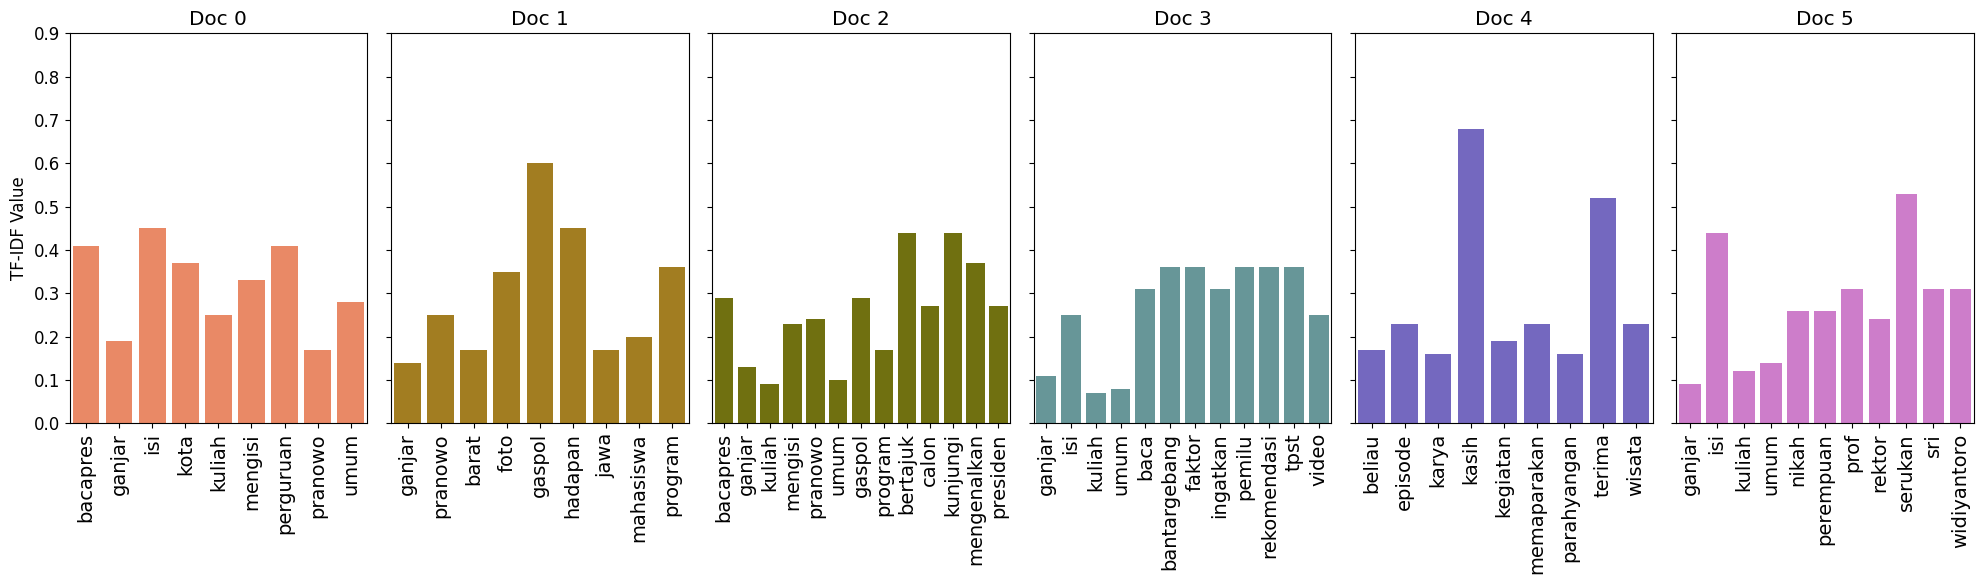

In [ ]:
x = 'terms'
y = 'tf_idf'

plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(1, 6, figsize=(20,6), sharey = True)
sns.barplot(ax=axes[0], data = df_dtm_unigram_doc0, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'coral')
sns.barplot(ax=axes[1], data = df_dtm_unigram_doc1, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'darkgoldenrod')
sns.barplot(ax=axes[2], data = df_dtm_unigram_doc2, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'olive')
sns.barplot(ax=axes[3], data = df_dtm_unigram_doc3, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'cadetblue')
sns.barplot(ax=axes[4], data = df_dtm_unigram_doc4, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'slateblue')
sns.barplot(ax=axes[5], data = df_dtm_unigram_doc5, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'orchid')
axes[0].set(ylabel = 'TF-IDF Value')
axes[0].set_title('Doc 0')
axes[1].set_title('Doc 1')
axes[2].set_title('Doc 2')
axes[3].set_title('Doc 3')
axes[4].set_title('Doc 4')
axes[5].set_title('Doc 5')
axes[0].set(xlabel = None)
axes[1].set(xlabel = None)
axes[2].set(xlabel = None)
axes[3].set(xlabel = None)
axes[4].set(xlabel = None)
axes[5].set(xlabel = None)
axes[0].tick_params('x', labelrotation = 90, labelsize = 14)
axes[1].tick_params('x', labelrotation = 90, labelsize = 14)
axes[2].tick_params('x', labelrotation = 90, labelsize = 14)
axes[3].tick_params('x', labelrotation = 90, labelsize = 14)
axes[4].tick_params('x', labelrotation = 90, labelsize = 14)
axes[5].tick_params('x', labelrotation = 90, labelsize = 14)
axes[0].set(ylim=(0.00, 0.90))
plt.tight_layout()
plt.show()

#Plot semua docs

In [ ]:
list_all_dtm_unigram = []
for i in range(len(list_of_dtm_unigram)):
  for j in range(len(list_of_dtm_unigram[i])):
    list_all_dtm_unigram.append(list_of_dtm_unigram[i][j])

In [ ]:
df_dtm_unigram = pd.DataFrame(list_all_dtm_unigram, columns = ['terms', 'tf_idf'])

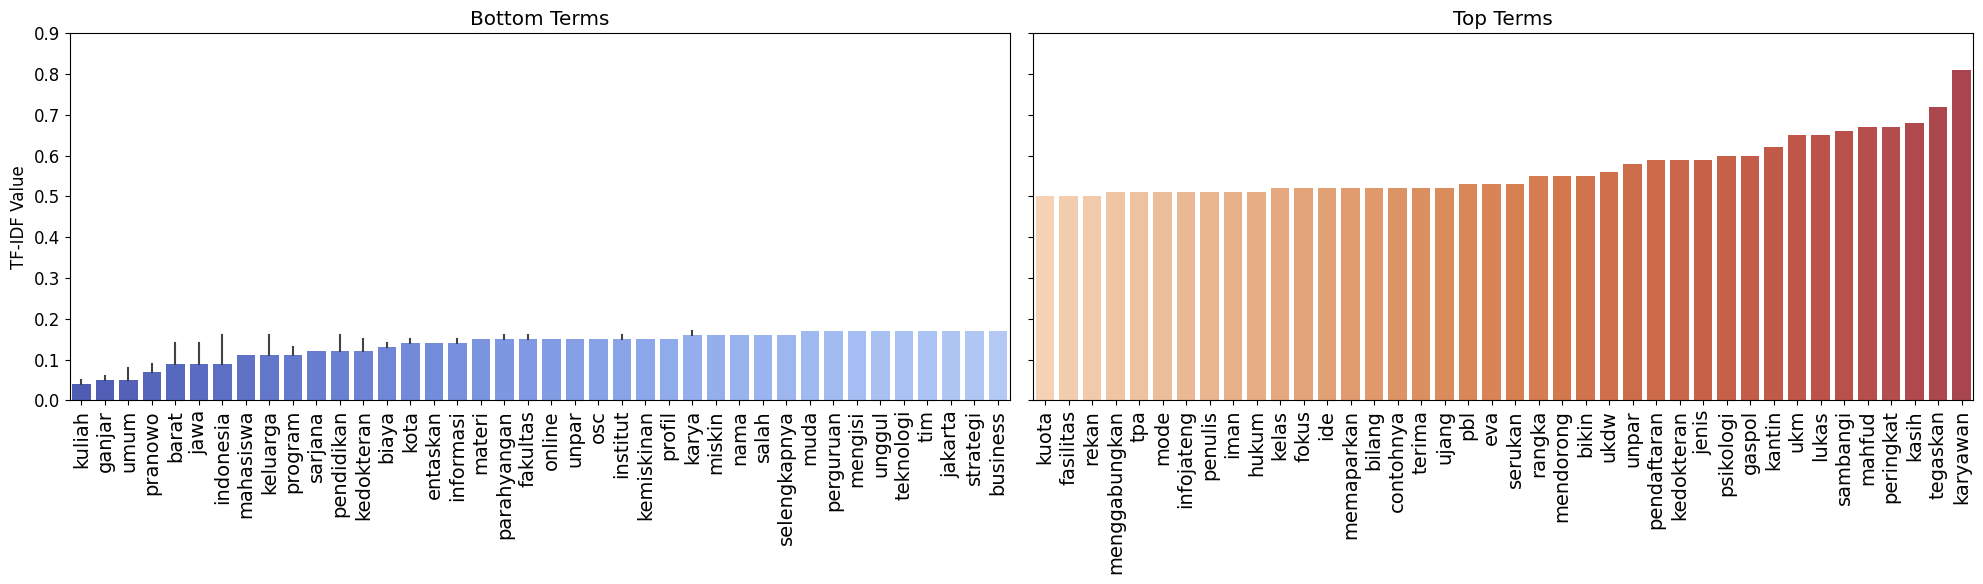

Lowest TF-IDF Value = 0.04 
Highest TF-IDF Value = 0.81


In [ ]:
limit = 40
limit_bottom = 216
x = 'terms'
y = 'tf_idf'

data_sort = df_dtm_unigram.sort_values(by=[y], ascending = True)
data_bottom = data_sort[0:limit_bottom]
data_top = data_sort[(len(data_sort)-limit):len(data_sort)]

tf_idf_min = data_sort[y].min()
tf_idf_max = data_sort[y].max()

plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(1, 2, figsize=(20,6), sharey = True)
sns.barplot(ax=axes[0], data = data_bottom, x = x, y = y, hue = x, estimator= np.min, err_kws={'linewidth': 1.5}, palette = sns.color_palette('coolwarm', limit*3))
sns.barplot(ax=axes[1], data = data_top, x = x, y = y, hue = x, estimator= np.min, err_kws={'linewidth': 1.5}, palette = sns.color_palette('icefire_r', limit*4))
axes[0].set(ylabel = 'TF-IDF Value')
axes[0].set_title('Bottom Terms')
axes[1].set_title('Top Terms')
axes[0].set(xlabel = None)
axes[1].set(xlabel = None)
axes[0].tick_params('x', labelrotation = 90, labelsize = 14)
axes[1].tick_params('x', labelrotation = 90, labelsize = 14)
axes[0].set(ylim=(0.00, 0.90))
plt.tight_layout()
plt.show()

print('Lowest TF-IDF Value =', tf_idf_min, '\nHighest TF-IDF Value =', tf_idf_max)

#Filtering low value (bila diperlukan)

In [47]:
def low_filtering(corpus_in, dictionary_in, tf_idf_in, low_value):
    corpus = corpus_in
    words = []
    dictionary = dictionary_in
    for i in range(0, len(corpus)):
        bow = corpus[i]
        low_value_words = []
        tfidf_ids = [id for id, value in tf_idf_in[bow]]
        bow_ids = [id for id, value in bow]
        low_value_words = [id for id, value in tf_idf_in[bow] if value < low_value]
        drops = low_value_words
        for item in drops:
          words.append(dictionary[item])
        new_bow = [b for b in bow if b[0] not in low_value_words]
        corpus[i] = new_bow
    return corpus

In [48]:
corpus_unigram_filtered = low_filtering(corpus_unigram, dictionary_unigram, tf_idf_unigram, 0.01)

In [50]:
# Lihat corpus filtered dan word frequency
print("Total number of elements in corpus unigram tf_idf_filtered: ", get_all_elements(corpus_unigram_filtered))
limit = 5
for doc in corpus_unigram_filtered[0:limit]:
   print([[dictionary_unigram[id], freq] for id, freq in doc])

Total number of elements in corpus unigram tf_idf_filtered:  1274
[['bacapres', 1], ['ganjar', 2], ['isi', 1], ['kota', 1], ['kuliah', 2], ['mengisi', 1], ['perguruan', 1], ['pranowo', 1], ['umum', 2]]
[['ganjar', 2], ['pranowo', 2], ['barat', 1], ['foto', 1], ['gaspol', 2], ['hadapan', 2], ['jawa', 1], ['mahasiswa', 1], ['program', 2]]
[['bacapres', 1], ['ganjar', 2], ['kuliah', 1], ['mengisi', 1], ['pranowo', 2], ['umum', 1], ['gaspol', 1], ['program', 1], ['bertajuk', 1], ['calon', 1], ['kunjungi', 1], ['mengenalkan', 1], ['presiden', 1]]
[['ganjar', 2], ['isi', 1], ['kuliah', 1], ['umum', 1], ['baca', 1], ['bantargebang', 1], ['faktor', 1], ['ingatkan', 1], ['pemilu', 1], ['rekomendasi', 1], ['tpst', 1], ['video', 1]]
[['beliau', 1], ['episode', 1], ['karya', 1], ['kasih', 3], ['kegiatan', 1], ['memaparakan', 1], ['parahyangan', 1], ['terima', 3], ['wisata', 1]]


_____

#Preprocessing tahap II bigram/trigram
Evaluation & low value filtering using TF-IDF pada corpus bigram/trigram

In [51]:
# Create dictionary & corpus
dictionary_trigram_high = Dictionary(text_list_trigrams_high)
corpus_trigram_high = [dictionary_trigram_high.doc2bow(text) for text in text_list_trigrams_high]

print(dictionary_trigram_high)
print(corpus_trigram_high)

Dictionary<666 unique tokens: ['bacapres', 'ganjar', 'isi', 'kota', 'kuliah']...>
[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 2)], [(1, 2), (7, 2), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2)], [(0, 1), (1, 2), (4, 1), (5, 1), (7, 2), (8, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)], [(1, 2), (2, 1), (4, 1), (8, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1)], [(26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 3), (33, 1)], [(1, 2), (2, 2), (4, 2), (8, 2), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 1)], [(1, 2), (7, 1), (31, 1), (34, 1), (38, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1)], [(1, 2), (7, 2), (25, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1)], [(3, 1), (54, 2), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1)], [(61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 2), (71, 1), (72, 1)], [(70, 1), (73, 1), (74, 1), (75, 1), 

In [52]:
# Cek isi corpus
print("Total number of elements in corpus bow: ", get_all_elements(corpus_trigram_high))
limit = 5
for doc in corpus_trigram_high[0:limit]:
   print([[dictionary_trigram_high[id], freq] for id, freq in doc])

Total number of elements in corpus bow:  1156
[['bacapres', 1], ['ganjar', 2], ['isi', 1], ['kota', 1], ['kuliah', 2], ['mengisi', 1], ['perguruan', 1], ['pranowo', 1], ['umum', 2]]
[['ganjar', 2], ['pranowo', 2], ['foto', 1], ['hadapan', 2], ['jawa_barat', 1], ['mahasiswa', 1], ['program_gaspol', 2]]
[['bacapres', 1], ['ganjar', 2], ['kuliah', 1], ['mengisi', 1], ['pranowo', 2], ['umum', 1], ['program_gaspol', 1], ['bertajuk', 1], ['calon_presiden', 1], ['kunjungi', 1], ['mengenalkan', 1]]
[['ganjar', 2], ['isi', 1], ['kuliah', 1], ['umum', 1], ['baca', 1], ['bantargebang', 1], ['faktor', 1], ['ingatkan', 1], ['pemilu', 1], ['rekomendasi', 1], ['tpst', 1], ['video', 1]]
[['beliau', 1], ['episode', 1], ['karya', 1], ['kegiatan', 1], ['memaparakan', 1], ['parahyangan', 1], ['terima_kasih', 3], ['wisata', 1]]


In [53]:
# Buat document terms matrix TF-IDF
tf_idf_trigram_high = TfidfModel(corpus_trigram_high, normalize = True, smartirs='ntc') # Fit TF-IDF model
tf_idf_corpus_trigram_high = tf_idf_trigram_high[corpus_trigram_high] # Apply TF-IDF model

In [54]:
# Lihat corpus tf-idf dan weight
print("Total number of elements in corpus tf_idf: ", get_all_elements(tf_idf_corpus_trigram_high))
limit = 5
for doc in tf_idf_corpus_trigram_high[0:limit]:
   print([[dictionary_trigram_high[id], np.around(freq, decimals=2)] for id, freq in doc])

Total number of elements in corpus tf_idf:  1156
[['bacapres', 0.41], ['ganjar', 0.19], ['isi', 0.45], ['kota', 0.37], ['kuliah', 0.25], ['mengisi', 0.33], ['perguruan', 0.41], ['pranowo', 0.17], ['umum', 0.28]]
[['ganjar', 0.11], ['pranowo', 0.2], ['foto', 0.28], ['hadapan', 0.74], ['jawa_barat', 0.14], ['mahasiswa', 0.17], ['program_gaspol', 0.52]]
[['bacapres', 0.3], ['ganjar', 0.14], ['kuliah', 0.09], ['mengisi', 0.24], ['pranowo', 0.25], ['umum', 0.1], ['program_gaspol', 0.32], ['bertajuk', 0.46], ['calon_presiden', 0.28], ['kunjungi', 0.46], ['mengenalkan', 0.39]]
[['ganjar', 0.11], ['isi', 0.25], ['kuliah', 0.07], ['umum', 0.08], ['baca', 0.31], ['bantargebang', 0.36], ['faktor', 0.36], ['ingatkan', 0.31], ['pemilu', 0.36], ['rekomendasi', 0.36], ['tpst', 0.36], ['video', 0.25]]
[['beliau', 0.26], ['episode', 0.26], ['karya', 0.18], ['kegiatan', 0.22], ['memaparakan', 0.26], ['parahyangan', 0.18], ['terima_kasih', 0.78], ['wisata', 0.26]]


#Visualisasi DTM Trigram

In [ ]:
list_of_dtm_trigram = []
for doc in tf_idf_corpus_trigram_high:
   list_of_dtm_trigram.append([[dictionary_trigram_high[id], np.around(freq, decimals=2)] for id, freq in doc])

#Plot 5 dokumen

In [ ]:
df_dtm_trigram_doc0 = pd.DataFrame(list_of_dtm_trigram[0], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc1 = pd.DataFrame(list_of_dtm_trigram[1], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc2 = pd.DataFrame(list_of_dtm_trigram[2], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc3 = pd.DataFrame(list_of_dtm_trigram[3], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc4 = pd.DataFrame(list_of_dtm_trigram[4], columns = ['terms', 'tf_idf'])
df_dtm_trigram_doc5 = pd.DataFrame(list_of_dtm_trigram[5], columns = ['terms', 'tf_idf'])

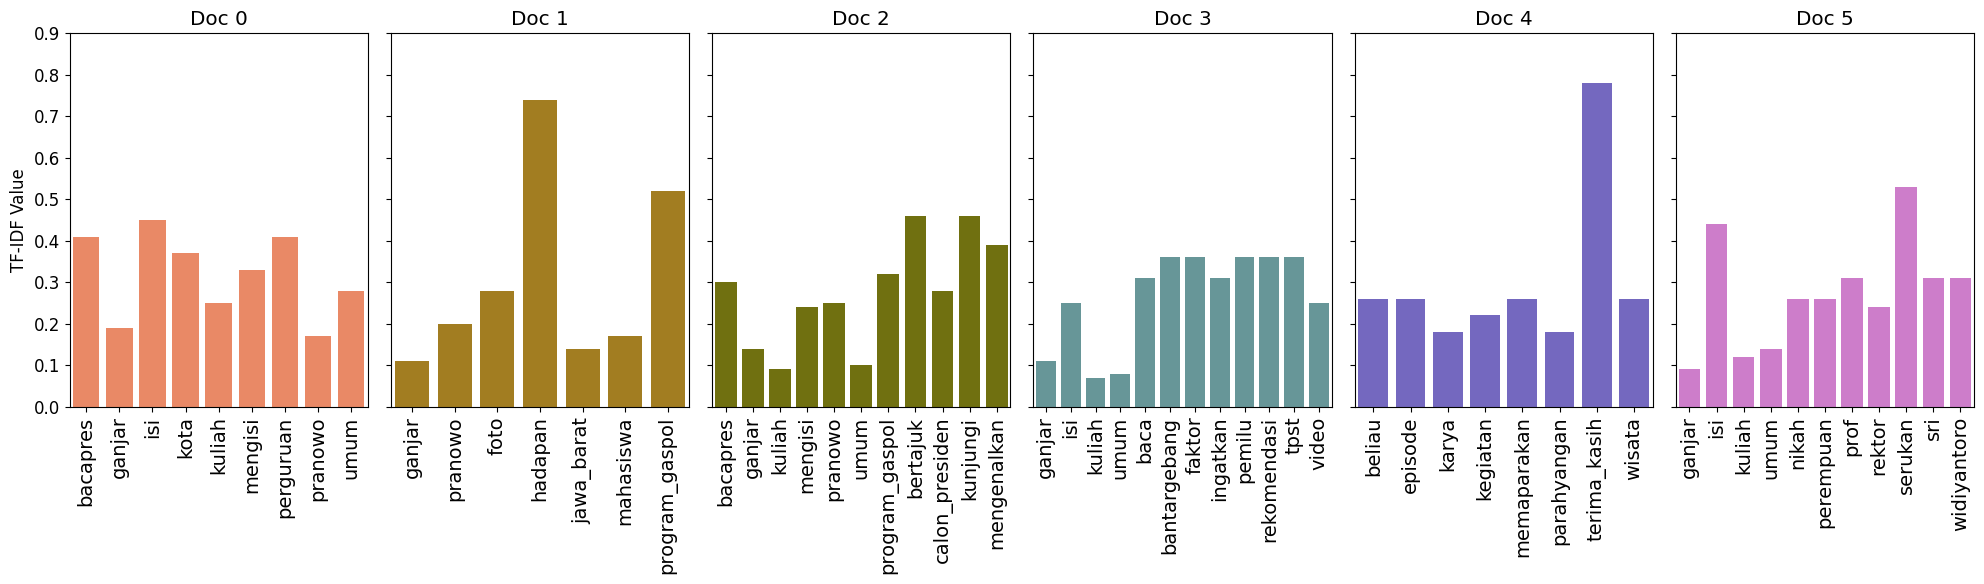

In [ ]:
x = 'terms'
y = 'tf_idf'

plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(1, 6, figsize=(20,6), sharey = True)
sns.barplot(ax=axes[0], data = df_dtm_trigram_doc0, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'coral')
sns.barplot(ax=axes[1], data = df_dtm_trigram_doc1, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'darkgoldenrod')
sns.barplot(ax=axes[2], data = df_dtm_trigram_doc2, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'olive')
sns.barplot(ax=axes[3], data = df_dtm_trigram_doc3, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'cadetblue')
sns.barplot(ax=axes[4], data = df_dtm_trigram_doc4, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'slateblue')
sns.barplot(ax=axes[5], data = df_dtm_trigram_doc5, x = x, y = y, estimator= np.min, err_kws={'linewidth': 1.5}, color = 'orchid')
axes[0].set(ylabel = 'TF-IDF Value')
axes[0].set_title('Doc 0')
axes[1].set_title('Doc 1')
axes[2].set_title('Doc 2')
axes[3].set_title('Doc 3')
axes[4].set_title('Doc 4')
axes[5].set_title('Doc 5')
axes[0].set(xlabel = None)
axes[1].set(xlabel = None)
axes[2].set(xlabel = None)
axes[3].set(xlabel = None)
axes[4].set(xlabel = None)
axes[5].set(xlabel = None)
axes[0].tick_params('x', labelrotation = 90, labelsize = 14)
axes[1].tick_params('x', labelrotation = 90, labelsize = 14)
axes[2].tick_params('x', labelrotation = 90, labelsize = 14)
axes[3].tick_params('x', labelrotation = 90, labelsize = 14)
axes[4].tick_params('x', labelrotation = 90, labelsize = 14)
axes[5].tick_params('x', labelrotation = 90, labelsize = 14)
axes[0].set(ylim=(0.00, 0.90))
plt.tight_layout()
plt.show()

#Plot semua docs

In [ ]:
list_all_dtm_trigram = []
for i in range(len(list_of_dtm_trigram)):
  for j in range(len(list_of_dtm_trigram[i])):
    list_all_dtm_trigram.append(list_of_dtm_trigram[i][j])

In [ ]:
df_dtm_trigram = pd.DataFrame(list_all_dtm_trigram, columns = ['terms', 'tf_idf'])

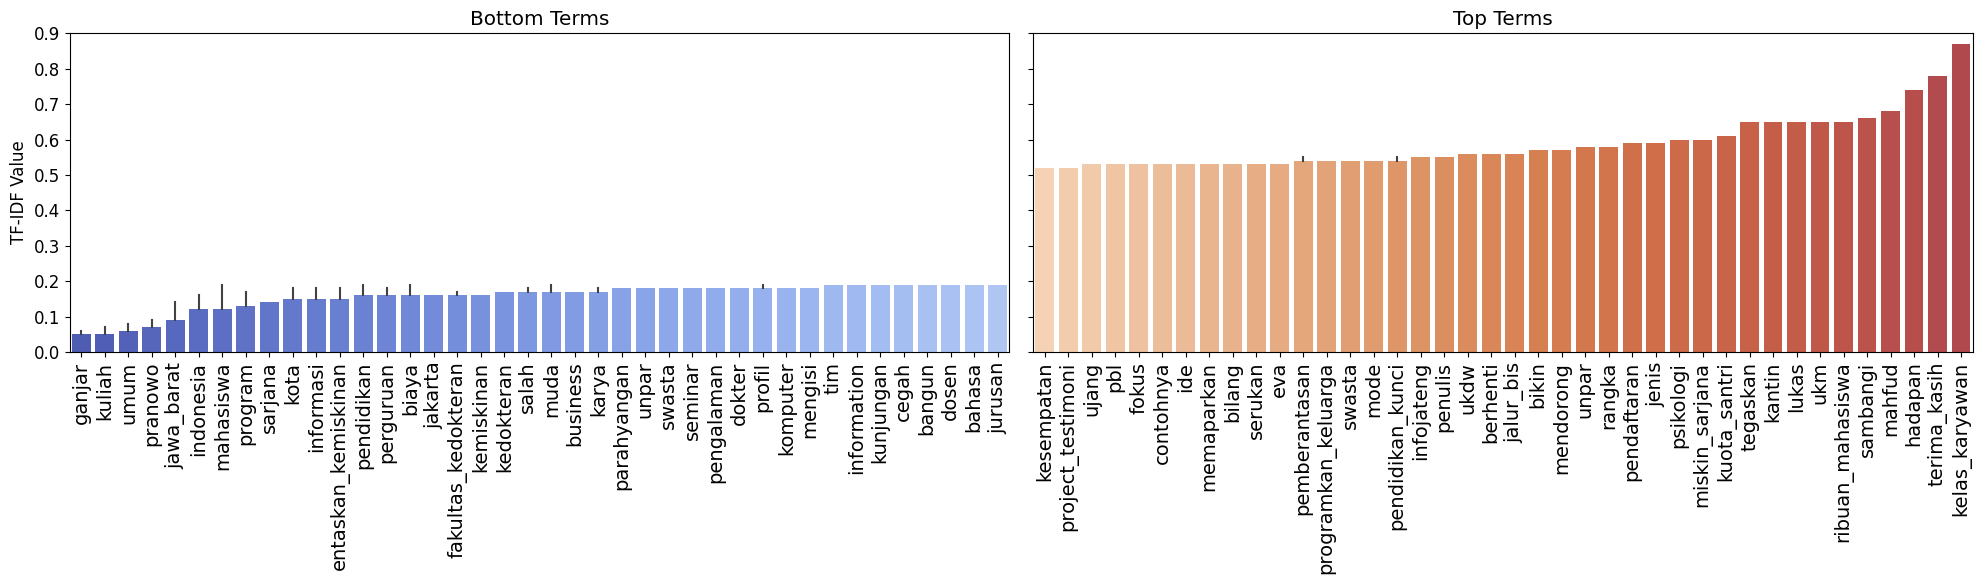

Lowest TF-IDF Value = 0.05 
Highest TF-IDF Value = 0.87


In [ ]:
limit = 42
limit_bottom = 219
x = 'terms'
y = 'tf_idf'

data_sort = df_dtm_trigram.sort_values(by=[y], ascending = True)
data_bottom = data_sort[0:limit_bottom]
data_top = data_sort[(len(data_sort)-limit):len(data_sort)]

tf_idf_min = data_sort[y].min()
tf_idf_max = data_sort[y].max()

plt.rcParams['font.size'] = 12
fig, axes = plt.subplots(1, 2, figsize=(20,6), sharey = True)
sns.barplot(ax=axes[0], data = data_bottom, x = x, y = y, hue = x, estimator= np.min, err_kws={'linewidth': 1.5}, palette = sns.color_palette('coolwarm', limit*3))
sns.barplot(ax=axes[1], data = data_top, x = x, y = y, hue = x, estimator= np.min, err_kws={'linewidth': 1.5}, palette = sns.color_palette('icefire_r', limit*4))
axes[0].set(ylabel = 'TF-IDF Value')
axes[0].set_title('Bottom Terms')
axes[1].set_title('Top Terms')
axes[0].set(xlabel = None)
axes[1].set(xlabel = None)
axes[0].tick_params('x', labelrotation = 90, labelsize = 14)
axes[1].tick_params('x', labelrotation = 90, labelsize = 14)
axes[0].set(ylim=(0.00, 0.90))
plt.tight_layout()
plt.show()

print('Lowest TF-IDF Value =', tf_idf_min, '\nHighest TF-IDF Value =', tf_idf_max)

#Filtering low value (bila diperlukan)

In [55]:
corpus_trigram_high_filtered = low_filtering(corpus_trigram_high, dictionary_trigram_high, tf_idf_trigram_high, 0.01)

In [56]:
# Lihat corpus filtered dan word frequency
print("Total number of elements in corpus trigram tf_idf_filtered: ", get_all_elements(corpus_trigram_high_filtered))
limit = 5
for doc in corpus_trigram_high_filtered[0:limit]:
   print([[dictionary_trigram_high[id], freq] for id, freq in doc])

Total number of elements in corpus trigram tf_idf_filtered:  1156
[['bacapres', 1], ['ganjar', 2], ['isi', 1], ['kota', 1], ['kuliah', 2], ['mengisi', 1], ['perguruan', 1], ['pranowo', 1], ['umum', 2]]
[['ganjar', 2], ['pranowo', 2], ['foto', 1], ['hadapan', 2], ['jawa_barat', 1], ['mahasiswa', 1], ['program_gaspol', 2]]
[['bacapres', 1], ['ganjar', 2], ['kuliah', 1], ['mengisi', 1], ['pranowo', 2], ['umum', 1], ['program_gaspol', 1], ['bertajuk', 1], ['calon_presiden', 1], ['kunjungi', 1], ['mengenalkan', 1]]
[['ganjar', 2], ['isi', 1], ['kuliah', 1], ['umum', 1], ['baca', 1], ['bantargebang', 1], ['faktor', 1], ['ingatkan', 1], ['pemilu', 1], ['rekomendasi', 1], ['tpst', 1], ['video', 1]]
[['beliau', 1], ['episode', 1], ['karya', 1], ['kegiatan', 1], ['memaparakan', 1], ['parahyangan', 1], ['terima_kasih', 3], ['wisata', 1]]


-----
-----

#B. PROCESSING

-----
-----

#LDA topic modeling


In [57]:
from gensim.models import LdaModel

In [58]:
from gensim.models.coherencemodel import CoherenceModel

#Build initial models untuk evaluasi coherence score corpus unigram filtered

In [59]:
# Gensim LDA model
def compute_coherence_values_lda_model_unigram(dictionary, corpus, texts, limit, start, step):
    coherence_values_lda_unigram = []
    model_list_lda_unigram = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, chunksize=2000, alpha='auto', eta='auto', iterations=200, passes=50, eval_every=None, random_state=5)

        model_list_lda_unigram.append(lda_model)
        coherencemodel_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_lda_unigram.append(coherencemodel_lda.get_coherence())

    return model_list_lda_unigram, coherence_values_lda_unigram

In [60]:
start = 1
limit = 40
step = 1
dictionary = dictionary_unigram
corpus = corpus_unigram_filtered
texts = text_list
model_list_lda_unigram, coherence_values_lda_unigram = compute_coherence_values_lda_model_unigram(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

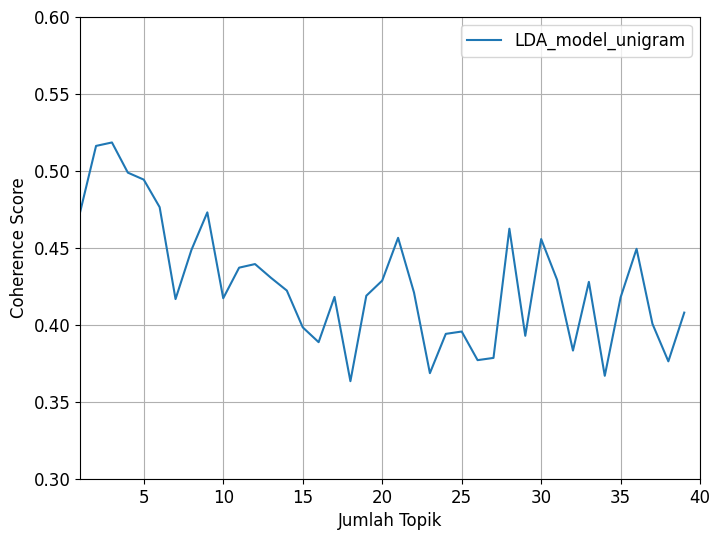

In [62]:
# Show graph
x = range(start, limit, step)
y_lda = coherence_values_lda_unigram

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 12
plt.plot(x, y_lda, label='LDA_model_unigram')
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score")
plt.ylim(0.3, 0.6)
plt.xlim(1, 40)
plt.legend(loc='best')
plt.grid()
plt.savefig('DATASAVE/SERP1_coherence_graph_unigram.png')
plt.show()

Dari grafik di atas, melihat range antara k = 5 s.d. 15, kandidat pilihan untuk analisis validasi adalah K = 5, 6, 9

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_lda_unigram):
    print("Jumlah Topik =", m, ", Coherence Score =", round(cv, 4))

Jumlah Topik = 1 , Coherence Score = 0.4732
Jumlah Topik = 2 , Coherence Score = 0.5161
Jumlah Topik = 3 , Coherence Score = 0.5184
Jumlah Topik = 4 , Coherence Score = 0.4988
Jumlah Topik = 5 , Coherence Score = 0.4942
Jumlah Topik = 6 , Coherence Score = 0.4763
Jumlah Topik = 7 , Coherence Score = 0.4167
Jumlah Topik = 8 , Coherence Score = 0.4486
Jumlah Topik = 9 , Coherence Score = 0.4729
Jumlah Topik = 10 , Coherence Score = 0.4172
Jumlah Topik = 11 , Coherence Score = 0.4371
Jumlah Topik = 12 , Coherence Score = 0.4394
Jumlah Topik = 13 , Coherence Score = 0.4305
Jumlah Topik = 14 , Coherence Score = 0.4222
Jumlah Topik = 15 , Coherence Score = 0.3983
Jumlah Topik = 16 , Coherence Score = 0.3887
Jumlah Topik = 17 , Coherence Score = 0.4181
Jumlah Topik = 18 , Coherence Score = 0.3633
Jumlah Topik = 19 , Coherence Score = 0.4188
Jumlah Topik = 20 , Coherence Score = 0.4286
Jumlah Topik = 21 , Coherence Score = 0.4564
Jumlah Topik = 22 , Coherence Score = 0.4209
Jumlah Topik = 23 ,

#Analisis terms isi topic untuk menentukan kandidat jumlah topik optimal

In [ ]:
num_topics = 5
x = num_topics-1
optimal_model_lda = model_list_lda_unigram[x]
optimal_model_lda.show_topics(num_topics)

[(0,
  '0.012*"salah" + 0.008*"sama" + 0.008*"slamet" + 0.008*"riyadi" + 0.008*"profil" + 0.008*"ignatius" + 0.008*"guru" + 0.008*"gigi" + 0.008*"potret" + 0.008*"cantik"'),
 (1,
  '0.013*"pranowo" + 0.013*"ganjar" + 0.011*"mahasiswi" + 0.009*"tpa" + 0.009*"bahasa" + 0.009*"karya" + 0.009*"batik" + 0.009*"indonesia" + 0.008*"jawa" + 0.008*"barat"'),
 (2,
  '0.017*"psikologi" + 0.013*"terima" + 0.013*"kasih" + 0.009*"eva" + 0.009*"project" + 0.009*"produk" + 0.009*"testimoni" + 0.009*"swasta" + 0.009*"program" + 0.005*"salah"'),
 (3,
  '0.106*"ganjar" + 0.045*"kuliah" + 0.041*"umum" + 0.038*"pranowo" + 0.019*"program" + 0.016*"keluarga" + 0.016*"kemiskinan" + 0.016*"jawa" + 0.016*"barat" + 0.013*"hadapan"'),
 (4,
  '0.012*"information" + 0.012*"karyawan" + 0.012*"kelas" + 0.010*"umum" + 0.010*"kuliah" + 0.009*"lukas" + 0.009*"informasi" + 0.009*"dokter" + 0.009*"kedokteran" + 0.007*"jawa"')]

In [ ]:
num_topics = 6
x = num_topics-1
optimal_model_lda = model_list_lda_unigram[x]
optimal_model_lda.show_topics(num_topics)

[(0,
  '0.014*"salah" + 0.009*"potret" + 0.009*"produk" + 0.009*"testimoni" + 0.009*"kuota" + 0.009*"cantik" + 0.009*"project" + 0.009*"santri" + 0.009*"gigi" + 0.009*"nisa"'),
 (1,
  '0.011*"ganjar" + 0.011*"momen" + 0.010*"bahasa" + 0.010*"pasteur" + 0.010*"indonesia" + 0.010*"tpa" + 0.010*"batik" + 0.010*"karya" + 0.010*"menarik" + 0.010*"asyik"'),
 (2,
  '0.019*"psikologi" + 0.015*"terima" + 0.015*"kasih" + 0.010*"siagian" + 0.010*"gigi" + 0.010*"rivita" + 0.010*"beliau" + 0.010*"swasta" + 0.010*"dokter" + 0.010*"eva"'),
 (3,
  '0.101*"ganjar" + 0.045*"kuliah" + 0.044*"pranowo" + 0.041*"umum" + 0.020*"kemiskinan" + 0.017*"program" + 0.016*"barat" + 0.016*"jawa" + 0.014*"mahasiswa" + 0.013*"kedokteran"'),
 (4,
  '0.064*"ganjar" + 0.033*"kuliah" + 0.030*"miskin" + 0.030*"umum" + 0.029*"keluarga" + 0.024*"sarjana" + 0.018*"program" + 0.012*"karyawan" + 0.012*"barat" + 0.012*"jawa"'),
 (5,
  '0.023*"ganjar" + 0.015*"muda" + 0.013*"seminar" + 0.012*"pranowo" + 0.010*"parahyangan" + 0.01

In [ ]:
num_topics = 9
x = num_topics-1
optimal_model_lda = model_list_lda_unigram[x]
optimal_model_lda.show_topics(num_topics)

[(0,
  '0.015*"mahasiswa" + 0.015*"salah" + 0.015*"nisa" + 0.015*"gigi" + 0.015*"rekan" + 0.015*"cantik" + 0.015*"potret" + 0.008*"tol" + 0.008*"baper" + 0.008*"disorot"'),
 (1,
  '0.039*"pranowo" + 0.034*"ganjar" + 0.032*"mahasiswi" + 0.024*"momen" + 0.016*"dicuekin" + 0.013*"jawa" + 0.013*"barat" + 0.012*"video" + 0.012*"menarik" + 0.012*"asyik"'),
 (2,
  '0.029*"psikologi" + 0.022*"terima" + 0.022*"kasih" + 0.015*"eva" + 0.008*"lose" + 0.008*"hebat" + 0.008*"kejuaraan" + 0.008*"kodiklatal" + 0.008*"berusaha" + 0.008*"parahyangan"'),
 (3,
  '0.055*"ganjar" + 0.036*"kuliah" + 0.032*"pranowo" + 0.027*"umum" + 0.018*"kedokteran" + 0.018*"gaspol" + 0.016*"program" + 0.016*"peringkat" + 0.016*"fakultas" + 0.011*"mengisi"'),
 (4,
  '0.111*"ganjar" + 0.049*"umum" + 0.048*"kuliah" + 0.035*"jawa" + 0.035*"barat" + 0.031*"keluarga" + 0.029*"kemiskinan" + 0.027*"hadapan" + 0.025*"ribuan" + 0.025*"miskin"'),
 (5,
  '0.076*"ganjar" + 0.026*"umum" + 0.025*"kuliah" + 0.023*"pranowo" + 0.016*"semina

-----

##Build initial models untuk evaluasi coherence score corpus trigram

In [64]:
def compute_coherence_values_lda_model_trigram_high(dictionary, corpus, texts, limit, start, step):
    coherence_values_lda_trigram_high = []
    model_list_lda_trigram_high = []
    for num_topics in range(start, limit, step):
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, chunksize=2000, alpha='auto', eta='auto', iterations=200, passes=50, eval_every=None, random_state=10)

        model_list_lda_trigram_high.append(lda_model)
        coherencemodel_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_lda_trigram_high.append(coherencemodel_lda.get_coherence())

    return model_list_lda_trigram_high, coherence_values_lda_trigram_high

In [65]:
start = 1
limit = 40
step = 1
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered
texts = text_list_trigrams_high
model_list_lda_trigram_high, coherence_values_lda_trigram_high = compute_coherence_values_lda_model_trigram_high(dictionary=dictionary, corpus=corpus, texts=texts, start=start, limit=limit, step=step)

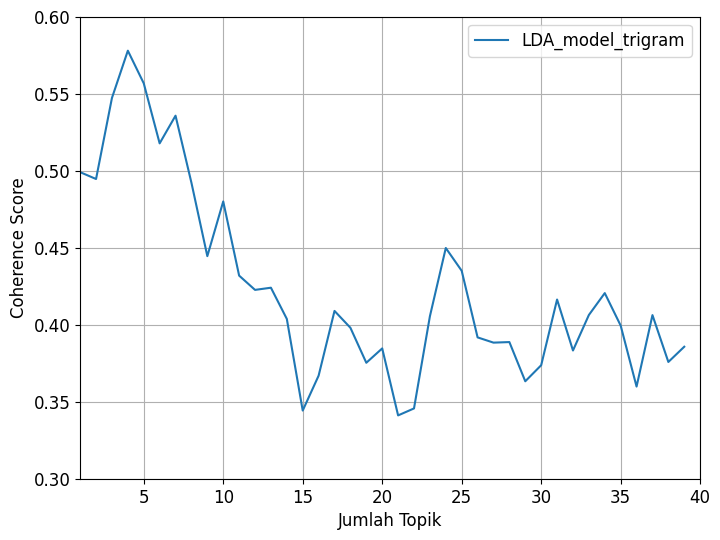

In [67]:
# Show graph
x = range(start, limit, step)
y_lda = coherence_values_lda_trigram_high

plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 12
plt.plot(x, y_lda, label='LDA_model_trigram')
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score")
plt.ylim(0.3, 0.6)
plt.xlim(1, 40)
plt.legend(loc='best')
plt.grid()
plt.savefig('DATASAVE/SERP1_coherence_graph_trigram.png')
plt.show()

Dari grafik di atas, melihat range antara k = 5 s.d. 15, kandidat pilihan untuk analisis validasi adalah K = 5, 7, 10

In [ ]:
# Print the coherence scores
for m, cv in zip(x, coherence_values_lda_trigram_high):
    print("Jumlah Topik =", m, ", Coherence Score =", round(cv, 4))

Jumlah Topik = 1 , Coherence Score = 0.4991
Jumlah Topik = 2 , Coherence Score = 0.4946
Jumlah Topik = 3 , Coherence Score = 0.5472
Jumlah Topik = 4 , Coherence Score = 0.5779
Jumlah Topik = 5 , Coherence Score = 0.5568
Jumlah Topik = 6 , Coherence Score = 0.5178
Jumlah Topik = 7 , Coherence Score = 0.5357
Jumlah Topik = 8 , Coherence Score = 0.4922
Jumlah Topik = 9 , Coherence Score = 0.4445
Jumlah Topik = 10 , Coherence Score = 0.48
Jumlah Topik = 11 , Coherence Score = 0.4319
Jumlah Topik = 12 , Coherence Score = 0.4226
Jumlah Topik = 13 , Coherence Score = 0.424
Jumlah Topik = 14 , Coherence Score = 0.4038
Jumlah Topik = 15 , Coherence Score = 0.3443
Jumlah Topik = 16 , Coherence Score = 0.3669
Jumlah Topik = 17 , Coherence Score = 0.409
Jumlah Topik = 18 , Coherence Score = 0.398
Jumlah Topik = 19 , Coherence Score = 0.3753
Jumlah Topik = 20 , Coherence Score = 0.3846
Jumlah Topik = 21 , Coherence Score = 0.3411
Jumlah Topik = 22 , Coherence Score = 0.3456
Jumlah Topik = 23 , Cohe

In [ ]:
num_topics = 5
x = num_topics-1
optimal_model_lda_trigram = model_list_lda_trigram_high[x]
optimal_model_lda_trigram.show_topics(num_topics)

[(0,
  '0.092*"ganjar" + 0.055*"umum" + 0.053*"kuliah" + 0.028*"pranowo" + 0.018*"mahasiswa" + 0.018*"hadapan_ribuan" + 0.014*"jawa_barat" + 0.009*"program_gaspol" + 0.009*"mengisi" + 0.009*"programkan_keluarga"'),
 (1,
  '0.098*"ganjar" + 0.048*"pranowo" + 0.025*"kuliah" + 0.021*"umum" + 0.017*"jawa_barat" + 0.014*"momen" + 0.014*"kemiskinan" + 0.013*"program" + 0.012*"fakultas_kedokteran" + 0.010*"keluarga_miskin"'),
 (2,
  '0.013*"indonesia" + 0.013*"karya" + 0.010*"batik_lasem" + 0.010*"lukas" + 0.010*"mode" + 0.010*"atma_jaya_yogyakarta" + 0.010*"islam" + 0.010*"mahasiswa" + 0.007*"kuliah" + 0.007*"gigi"'),
 (3,
  '0.013*"mahfud" + 0.010*"psikologi" + 0.010*"jenis" + 0.010*"program" + 0.010*"pendaftaran" + 0.007*"parahyangan" + 0.007*"hukum" + 0.007*"lengkap" + 0.007*"fakultas_kedokteran" + 0.007*"dokter"'),
 (4,
  '0.009*"bahasa_inggris" + 0.009*"kost" + 0.009*"pasteur" + 0.009*"teknik" + 0.009*"tpa_berhitung" + 0.009*"peringkat" + 0.009*"peringkat_harapan" + 0.009*"project_testi

In [ ]:
num_topics = 7
x = num_topics-1
optimal_model_lda_trigram = model_list_lda_trigram_high[x]
optimal_model_lda_trigram.show_topics(num_topics)

[(0,
  '0.078*"ganjar" + 0.049*"umum" + 0.049*"kuliah" + 0.026*"pranowo" + 0.014*"program_gaspol" + 0.014*"isi" + 0.011*"mengisi" + 0.010*"mahasiswa" + 0.008*"calon_presiden" + 0.008*"jakarta"'),
 (1,
  '0.072*"ganjar" + 0.036*"pranowo" + 0.022*"kuliah" + 0.019*"umum" + 0.015*"muda" + 0.015*"swasta" + 0.015*"fakultas_kedokteran" + 0.011*"terima_kasih" + 0.008*"ajak" + 0.008*"politik"'),
 (2,
  '0.020*"karya" + 0.015*"mode" + 0.015*"batik_lasem" + 0.012*"kuliah" + 0.011*"mahasiswa" + 0.011*"indonesia" + 0.010*"tim" + 0.010*"penghargaan" + 0.010*"seoul" + 0.010*"sama"'),
 (3,
  '0.012*"lukas" + 0.012*"jenis" + 0.012*"pendaftaran" + 0.009*"program" + 0.009*"kuliah" + 0.008*"fasilitas" + 0.008*"lengkap" + 0.008*"hukum" + 0.008*"pengalaman" + 0.008*"information"'),
 (4,
  '0.015*"tpa_berhitung" + 0.015*"bahasa_inggris" + 0.008*"ips" + 0.008*"osc" + 0.008*"online" + 0.008*"matematika" + 0.008*"test" + 0.008*"cek" + 0.008*"diujikan" + 0.008*"ipa"'),
 (5,
  '0.021*"psikologi" + 0.021*"stunting

In [ ]:
num_topics = 10
x = num_topics-1
optimal_model_lda_trigram = model_list_lda_trigram_high[x]
optimal_model_lda_trigram.show_topics(num_topics)

[(0,
  '0.032*"ganjar" + 0.022*"pranowo" + 0.014*"umum" + 0.012*"terima_kasih" + 0.012*"program_gaspol" + 0.012*"bacapres" + 0.012*"kesempatan" + 0.012*"muda" + 0.008*"slamet_riyadi" + 0.008*"guru"'),
 (1,
  '0.042*"ganjar" + 0.026*"fakultas_kedokteran" + 0.021*"pranowo" + 0.021*"swasta" + 0.016*"program_gaspol" + 0.016*"muda" + 0.014*"kuliah" + 0.011*"stunting" + 0.011*"perguruan" + 0.011*"sambangi"'),
 (2,
  '0.019*"karya" + 0.014*"batik_lasem" + 0.014*"kerja" + 0.014*"mahfud" + 0.010*"peringkat_harapan" + 0.010*"rekan" + 0.010*"gigi" + 0.010*"enak" + 0.010*"raih" + 0.010*"seoul"'),
 (3,
  '0.019*"information" + 0.019*"ukm" + 0.019*"pendaftaran" + 0.019*"malang" + 0.011*"program" + 0.010*"kuliah" + 0.010*"tema" + 0.010*"seminar" + 0.010*"surabaya" + 0.010*"shape"'),
 (4,
  '0.019*"bahasa_inggris" + 0.019*"kost" + 0.019*"pasteur" + 0.019*"tpa_berhitung" + 0.010*"unggul" + 0.010*"online" + 0.010*"test" + 0.010*"tpa" + 0.010*"matematika" + 0.010*"osc"'),
 (5,
  '0.016*"pengetahuan_strat

-----

#Analisis visual pyLDAvis

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
!pip install pyldavis
#!pip install --upgrade pyldavis

In [ ]:
# Reinstall pandas & numpy to this version if notebook running on Google Colab
# pyLDAvis on Google Colab works only with this version
# !pip install pandas==1.5.3
# !pip install numpy==1.23.5

In [72]:
import pyLDAvis.gensim

In [ ]:
pyLDAvis.enable_notebook() # enable visualisation on notebook

#pyLDAvis pada corpus unigram



In [75]:
# Build model unigram yang akan dianalisis
num_topics = 5
x = num_topics-1
select_model_lda_unigram_5 = model_list_lda_unigram[x]

num_topics = 6
x = num_topics-1
select_model_lda_unigram_6 = model_list_lda_unigram[x]

num_topics = 9
x = num_topics-1
select_model_lda_unigram_9 = model_list_lda_unigram[x]

In [83]:
ldamodel = select_model_lda_unigram_5
dictionary = dictionary_unigram
corpus = corpus_unigram_filtered

vis5_u = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis5_u

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.216275 -0.019314       1        1  55.236522
1      0.010739  0.129576       2        1  14.006271
4      0.047899 -0.107484       3        1  13.943068
0      0.088150 -0.012168       4        1   9.337380
2      0.069487  0.009389       5        1   7.476759, topic_info=        Term       Freq      Total Category  logprob  loglift
1     ganjar  87.000000  87.000000  Default  30.0000  30.0000
7    pranowo  33.000000  33.000000  Default  29.0000  29.0000
8       umum  34.000000  34.000000  Default  28.0000  28.0000
4     kuliah  38.000000  38.000000  Default  27.0000  27.0000
15   program  16.000000  16.000000  Default  26.0000  26.0000
..       ...        ...        ...      ...      ...      ...
84   company   0.534115   1.545353   Topic5  -5.3124   1.5310
89   rexroth   0.534115   1.545353   Topic5  -5.3124   1.5310
92    teknik   0.534115   2.045817   Topic5  -5.3124   1.2504
135     raih   0.534115   1.644921   Topic5  -5.3124   1.4685
256   bahasa   0.534115   2.845005   Topic5  -5.3124   0.9207

[252 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
108       5  0.957017  adminsaac
194       2  0.555454       akun
444       4  0.908876  alexandra
466       5  0.957017     alumni
539       4  0.908876     apotek
...     ...       ...        ...
49        1  0.820986      unpar
526       3  0.834177        upn
527       3  0.834177    veteran
179       4  0.908876   visitasi
455       4  0.908876      vissi

[274 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 5, 1, 3])

In [84]:
ldamodel = select_model_lda_unigram_6
dictionary = dictionary_unigram
corpus = corpus_unigram_filtered

vis6_u = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis6_u

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.185678  0.016781       1        1  40.549155
4     -0.116936 -0.016866       2        1  15.518987
5      0.059685 -0.143818       3        1  15.179704
1      0.060202  0.111732       4        1  13.610955
0      0.096236  0.022428       5        1   8.074904
2      0.086490  0.009743       6        1   7.066296, topic_info=           Term      Freq      Total Category  logprob  loglift
1        ganjar  81.00000  81.000000  Default  30.0000  30.0000
121      miskin   8.00000   8.000000  Default  29.0000  29.0000
120    keluarga  11.00000  11.000000  Default  28.0000  28.0000
8          umum  32.00000  32.000000  Default  27.0000  27.0000
4        kuliah  36.00000  36.000000  Default  26.0000  26.0000
..          ...       ...        ...      ...      ...      ...
79    teknologi   0.55603   2.582644   Topic6  -5.2157   1.1141
256      bahasa   0.55603   3.016074   Topic6  -5.2157   0.9589
275  pendidikan   0.55603   6.461539   Topic6  -5.2157   0.1970
307       salah   0.55603   3.302761   Topic6  -5.2157   0.8681
411     sekolah   0.55603   1.768000   Topic6  -5.2157   1.4931

[314 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
108       6  0.902733   adminsaac
554       2  0.509693        ajak
329       3  0.774529      ajaran
444       5  0.876437   alexandra
252       3  0.512496        anak
...     ...       ...         ...
37        6  0.902733      wisata
361       1  0.305266  yogyakarta
361       3  0.305266  yogyakarta
361       4  0.305266  yogyakarta
361       5  0.305266  yogyakarta

[375 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 6, 2, 1, 3])

In [85]:
ldamodel = select_model_lda_unigram_9
dictionary = dictionary_unigram
corpus = corpus_unigram_filtered

vis9_u = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis9_u

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.238478  0.019920       1        1  25.855177
3     -0.109186  0.046078       2        1  21.453310
5     -0.064559 -0.008324       3        1  12.376742
1     -0.000585 -0.181428       4        1  12.172335
6      0.057321  0.100519       5        1   7.607927
8      0.073337 -0.047805       6        1   7.427801
0      0.099887  0.032429       7        1   4.876475
2      0.099443  0.026771       8        1   4.521494
7      0.082819  0.011840       9        1   3.708740, topic_info=         Term       Freq      Total Category  logprob  loglift
1      ganjar  81.000000  81.000000  Default  30.0000  30.0000
9       barat  16.000000  16.000000  Default  29.0000  29.0000
13       jawa  16.000000  16.000000  Default  28.0000  28.0000
8        umum  33.000000  33.000000  Default  27.0000  27.0000
53  mahasiswi   6.000000   6.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
79  teknologi   0.465567   2.336026   Topic9  -4.7487   1.6815
80        tim   0.465567   2.441583   Topic9  -4.7487   1.6373
81  widyatama   0.465567   1.839146   Topic9  -4.7487   1.9207
87     negeri   0.465566   1.877974   Topic9  -4.7487   1.8998
91        smk   0.465566   1.629891   Topic9  -4.7487   2.0415

[424 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
108       8  0.918421   adminsaac
329       6  0.825844      ajaran
194       4  0.494525        akun
444       7  0.902399   alexandra
466       8  0.918421      alumni
...     ...       ...         ...
37        8  0.918421      wisata
528       5  0.821855        ykpn
361       2  0.302048  yogyakarta
361       4  0.302048  yogyakarta
361       5  0.302048  yogyakarta

[432 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 6, 2, 7, 9, 1, 3, 8])

-----

#pyLDAvis pada corpus trigram



In [80]:
# Build model trigram yang akan dianalisis
num_topics = 5
x = num_topics-1
select_model_lda_trigram_5 = model_list_lda_trigram_high[x]

num_topics = 7
x = num_topics-1
select_model_lda_trigram_7 = model_list_lda_trigram_high[x]

num_topics = 10
x = num_topics-1
select_model_lda_trigram_10 = model_list_lda_trigram_high[x]

In [86]:
ldamodel = select_model_lda_trigram_5
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered

vis5_t = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis5_t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.145779  0.010611       1        1  32.250616
1      0.127851 -0.005718       2        1  29.902538
3     -0.092339 -0.112523       3        1  14.385989
2     -0.106364  0.099934       4        1  14.202074
4     -0.074926  0.007697       5        1   9.258783, topic_info=               Term       Freq      Total Category  logprob  loglift
1            ganjar  77.000000  77.000000  Default  30.0000  30.0000
8              umum  31.000000  31.000000  Default  29.0000  29.0000
7           pranowo  30.000000  30.000000  Default  28.0000  28.0000
4            kuliah  34.000000  34.000000  Default  27.0000  27.0000
201  hadapan_ribuan   8.000000   8.000000  Default  26.0000  26.0000
..              ...        ...        ...      ...      ...      ...
70             sama   0.570909   3.366037   Topic5  -5.3518   0.6053
72        widyatama   0.570909   1.862865   Topic5  -5.3518   1.1970
74          company   0.570909   1.862865   Topic5  -5.3518   1.1970
77           negeri   0.570909   1.685857   Topic5  -5.3518   1.2968
79    rexroth_bosch   0.570909   1.862865   Topic5  -5.3518   1.1970

[258 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
541       2  0.943946         ajak
316       3  0.824267       ajaran
235       1  0.932232         anak
302       5  0.905253     anugerah
526       3  0.824267       apotek
...     ...       ...          ...
25        2  0.594951        video
25        4  0.297476        video
40        1  0.720923  widiyantoro
72        1  0.536807    widyatama
72        5  0.536807    widyatama

[278 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 3, 5])

Dari diagram di atas: topik 1 dan 2 sangat overlap

In [87]:
ldamodel = select_model_lda_trigram_7
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered

vis7_t = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis7_t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.176618  0.035900       1        1  31.733993
0     -0.132530 -0.010875       2        1  21.254254
1     -0.078947 -0.065308       3        1  14.497353
3      0.117632 -0.105277       4        1  12.426683
2      0.082918  0.129135       5        1   8.847951
5      0.113615  0.005181       6        1   7.636877
4      0.073929  0.011243       7        1   3.602887, topic_info=                  Term       Freq      Total Category  logprob  loglift
1               ganjar  79.000000  79.000000  Default  30.0000  30.0000
8                 umum  31.000000  31.000000  Default  29.0000  29.0000
11          jawa_barat  15.000000  15.000000  Default  28.0000  28.0000
7              pranowo  30.000000  30.000000  Default  27.0000  27.0000
393          psikologi   3.000000   3.000000  Default  26.0000  26.0000
..                 ...        ...        ...      ...      ...      ...
79       rexroth_bosch   0.379540   1.567726   Topic7  -4.8163   1.9050
81                 smk   0.379540   1.749097   Topic7  -4.8163   1.7955
82              teknik   0.379540   2.079482   Topic7  -4.8163   1.6225
277  beliau_menamatkan   0.379539   1.749098   Topic7  -4.8163   1.7955
286         pendidikan   0.379539   4.182892   Topic7  -4.8163   0.9236

[341 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
540       3  0.787573           acara
541       3  0.517147            ajak
316       4  0.809304          ajaran
443       6  0.894811            aksi
179       1  0.897550  akun_instagram
...     ...       ...             ...
45        1  0.236395           unpar
45        2  0.472790           unpar
45        3  0.236395           unpar
25        1  0.835996           video
25        5  0.278665           video

[344 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 2, 4, 3, 6, 5])

Diagram di atas dianggap paling baik, semua topik terpisahkan dengan sedikit overlap

In [88]:
ldamodel = select_model_lda_trigram_10
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered

vis10_t = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
vis10_t

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.307086  0.076537       1        1  33.566384
0     -0.056619 -0.107187       2        1  13.645880
2      0.082201  0.113690       3        1  11.790944
9      0.050781  0.077398       4        1  10.293606
1     -0.050503 -0.121215       5        1   9.710834
8      0.065380  0.039087       6        1   5.712753
5      0.060714 -0.052591       7        1   4.790038
7      0.042888 -0.016561       8        1   3.600944
4      0.063200 -0.011735       9        1   3.515902
3      0.049046  0.002577      10        1   3.372715, topic_info=           Term       Freq      Total Category  logprob  loglift
1        ganjar  87.000000  87.000000  Default  30.0000  30.0000
8          umum  35.000000  35.000000  Default  29.0000  29.0000
7       pranowo  33.000000  33.000000  Default  28.0000  28.0000
4        kuliah  37.000000  37.000000  Default  27.0000  27.0000
11   jawa_barat  16.000000  16.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
106     program   0.501372  11.551356  Topic10  -4.4718   0.2522
4        kuliah   0.455188  37.965769  Topic10  -4.5685  -1.0343
37       rektor   0.439579   2.096794  Topic10  -4.6034   1.8271
95      seminar   0.439579   3.695560  Topic10  -4.6034   1.2604
220   informasi   0.439579   2.597390  Topic10  -4.6034   1.6130

[433 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
540       5  0.807849       acara
99        2  0.775385   adminsaac
541       5  0.528603        ajak
443       5  0.807849        aksi
432       3  0.781673   alexandra
...     ...       ...         ...
442       3  0.781673       vissi
72        3  0.553124   widyatama
72        6  0.553124   widyatama
515       4  0.799172        ykpn
516       4  0.799172  yogyakarta

[388 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 3, 10, 2, 9, 6, 8, 5, 4])

Dari diagram di atas: terdapat banyak topik yang overlap

#Save visualization pyLDAvis

In [89]:
# Save visualization (best model) to interactive HTML file
visualization_to_save = vis7_t
vispath = 'DATASAVE/VIS-LDA-7-SERP1.html'
pyLDAvis.save_html(visualization_to_save, vispath)

-----


#C. SAVE BEST MODEL

In [90]:
# Build model final yang akan disimpan
num_topics = 7
x = num_topics-1
select_model_lda_trigram_7 = model_list_lda_trigram_high[x]

In [91]:
# Cek isi topik model terbaik
topics_select_model_lda_trigram_7 = select_model_lda_trigram_7.show_topics(num_topics=num_topics, num_words=10, log=False, formatted=False)

# Print topics only
for topic_id, topic in topics_select_model_lda_trigram_7:
    print("Topic: {}".format(topic_id))
    print("Words: {}".format([word for word, _ in topic]))

Topic: 0
Words: ['ganjar', 'umum', 'kuliah', 'pranowo', 'program_gaspol', 'isi', 'mengisi', 'mahasiswa', 'calon_presiden', 'jakarta']
Topic: 1
Words: ['ganjar', 'pranowo', 'kuliah', 'umum', 'muda', 'swasta', 'fakultas_kedokteran', 'terima_kasih', 'ajak', 'politik']
Topic: 2
Words: ['karya', 'mode', 'batik_lasem', 'kuliah', 'mahasiswa', 'indonesia', 'tim', 'penghargaan', 'seoul', 'sama']
Topic: 3
Words: ['lukas', 'jenis', 'pendaftaran', 'program', 'kuliah', 'fasilitas', 'lengkap', 'hukum', 'pengalaman', 'information']
Topic: 4
Words: ['tpa_berhitung', 'bahasa_inggris', 'ips', 'osc', 'online', 'matematika', 'test', 'cek', 'diujikan', 'ipa']
Topic: 5
Words: ['psikologi', 'stunting', 'rahardjo', 'dosen', 'fakultas_kedokteran', 'membeberkan', 'kelor', 'theresia_monica', 'cegah', 'telkom_university']
Topic: 6
Words: ['ganjar', 'pranowo', 'jawa_barat', 'umum', 'kuliah', 'program', 'mahasiswa', 'momen', 'keluarga_miskin', 'kemiskinan']


In [92]:
from gensim.test.utils import datapath

In [93]:
# Select best model to save
SERP1_lda_model_7 = select_model_lda_trigram_7

In [100]:
# Set path
#modelpath = '/content/LDASAVE/SERP1_lda_model_7'
modelpath = 'LDASAVE/SERP1_lda_model_7'
save_file = datapath(modelpath)

# Save to folder
SERP1_lda_model_7.save(save_file)

In [ ]:
from gensim import models

# Load model from disk
#SERP1_lda_model_7 = models.ldamodel.LdaModel.load(save_file)

-----

#Validasi & save tabel distribusi topik dominan pada dokumen

In [101]:
# Find dominant topics in sentences
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Contribution', 'Topic_Keywords']

    # Add original docs to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

#Build tabel distribusi topik dominan pada dokumen (model terbaik)

In [105]:
ldamodel = select_model_lda_trigram_7
dictionary = dictionary_trigram_high
corpus = corpus_trigram_high_filtered
texts = text_list_trigrams_high

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doc', 'Topic', 'Dominance', 'Keywords', 'Document_Text_Content']

# Show
df_dominant_topic.sort_values('Topic').head(5)

,Doc,Topic,Dominance,Keywords,Document_Text_Content
0,0,0,0.9858,"ganjar, umum, kuliah, pranowo, program_gaspol, isi, mengisi, mahasiswa, calon_presiden, jakarta","[isi, kuliah, umum, ganjar, bacapres, ganjar, pranowo, mengisi, kuliah, umum, perguruan, kota]"
27,27,0,0.9788,"ganjar, umum, kuliah, pranowo, program_gaspol, isi, mengisi, mahasiswa, calon_presiden, jakarta","[ganjar, programkan_keluarga, miskin_sarjana, ganjar, hadapan_ribuan, mahasiswa, kuliah, umum]"
52,52,0,0.9830,"ganjar, umum, kuliah, pranowo, program_gaspol, isi, mengisi, mahasiswa, calon_presiden, jakarta","[beasiswa, oscmedcom, ditutup, pendaftar, ribu, atma_jaya_yogyakarta, sponsored, islam, indonesia, gajayana]"
32,32,0,0.9858,"ganjar, umum, kuliah, pranowo, program_gaspol, isi, mengisi, mahasiswa, calon_presiden, jakarta","[ganjar, pranowo, bertandang, katolik, unpar, unpar, kuliah, umum, ganjar, peran, anak, muda]"
24,24,0,0.9845,"ganjar, umum, kuliah, pranowo, program_gaspol, isi, mengisi, mahasiswa, calon_presiden, jakarta","[pengetahuan_strategi, legalitas_bisnis, pelaku, event, pengetahuan_strategi, legalitas_bisnis, pelaku, usaha, perkembangan, umkm, karirmu]"


#Save tabel dominant topic

In [106]:
# Save dataframe to csv
csvpath = 'DATASAVE/df_dominant_topic_SERP1_LDA_7.csv'
df_dominant_topic.to_csv(csvpath, index=False)

# Load dataframe
#df_dominant_topic = pd.read_csv(csvpath)

In [107]:
# Save dataframe to pickle
pklpath = 'DATASAVE/df_dominant_topic_SERP1_LDA_7.pkl'
df_dominant_topic.to_pickle(pklpath)

# Load dataframe from pickle
#df_dominant_topic = pd.read_pickle(pklpath)

-----
-----
-----
-----
-----

#Eksplorasi tambahan: analisis distribusi volume dokumen terhadap masing-masing topik (optional)

In [ ]:
topics_df = pd.DataFrame(topics_select_model_lda_trigram_7)

# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(100*topic_counts/topic_counts.sum(), 2)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
#df_dominant_topics_vol = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
df_dominant_topics_vol = pd.concat([topic_counts, topic_contribution, topics_df[1]], axis=1).sort_index()
df_dominant_topics_vol = df_dominant_topics_vol.reset_index()

# Change Column names
#df_dominant_topics_vol.columns = ['Index', 'Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
df_dominant_topics_vol.columns = ['Topics', 'Num_Documents', 'Perc_Documents', 'Topic_Text_Keywords']

# Show
df_dominant_topics_vol.head(num_topics)

,Topics,Num_Documents,Perc_Documents,Topic_Text_Keywords
0,0,23,22.12,"[(ganjar, 0.07755885), (umum, 0.04928695), (kuliah, 0.048562568), (pranowo, 0.026323156), (program_gaspol, 0.013812506), (isi, 0.013811139), (mengisi, 0.011126829), (mahasiswa, 0.010419824), (calo..."
1,1,16,15.38,"[(ganjar, 0.07232232), (pranowo, 0.035705354), (kuliah, 0.022281209), (umum, 0.01865802), (muda, 0.014583797), (swasta, 0.014583795), (fakultas_kedokteran, 0.014583795), (terima_kasih, 0.011063535..."
2,2,8,7.69,"[(karya, 0.019756313), (mode, 0.014987512), (batik_lasem, 0.014987512), (kuliah, 0.011842047), (mahasiswa, 0.01077506), (indonesia, 0.010610304), (tim, 0.010218707), (penghargaan, 0.010218707), (s..."
3,3,11,10.58,"[(lukas, 0.012244205), (jenis, 0.012244205), (pendaftaran, 0.012244203), (program, 0.009140203), (kuliah, 0.008764964), (fasilitas, 0.00834827), (lengkap, 0.00834827), (hukum, 0.00834827), (pengal..."
4,4,3,2.88,"[(tpa_berhitung, 0.015182228), (bahasa_inggris, 0.015182228), (ips, 0.008097093), (osc, 0.008097093), (online, 0.008097093), (matematika, 0.008097093), (test, 0.008097093), (cek, 0.008097093), (di..."
5,5,8,7.69,"[(psikologi, 0.02133938), (stunting, 0.02133938), (rahardjo, 0.011037533), (dosen, 0.011037533), (fakultas_kedokteran, 0.011037533), (membeberkan, 0.011037533), (kelor, 0.011037533), (theresia_mon..."
6,6,35,33.65,"[(ganjar, 0.10612273), (pranowo, 0.04025187), (jawa_barat, 0.035600062), (umum, 0.03493219), (kuliah, 0.034525998), (program, 0.017566208), (mahasiswa, 0.014323566), (momen, 0.014035637), (keluarg..."


In [ ]:
topic_counts

6    35
0    23
1    16
3    11
2     8
5     8
4     3
Name: Dominant_Topic, dtype: int64

In [ ]:
topic_contribution

6    33.65
0    22.12
1    15.38
3    10.58
2     7.69
5     7.69
4     2.88
Name: Dominant_Topic, dtype: float64

In [ ]:
# Distribusi topik penyusun dokumen (format: doc, topic index, dominance weight)
ldamodel = select_model_lda_trigram_7
corpus = corpus_trigram_high_filtered

count = 0
for i in ldamodel[corpus]:
    print("doc", count, i)
    count += 1

doc 0 [(0, 0.9857747)]
doc 1 [(0, 0.77076834), (6, 0.21913736)]
doc 2 [(0, 0.98685104)]
doc 3 [(0, 0.36123294), (2, 0.6272734)]
doc 4 [(1, 0.9819016)]
doc 5 [(0, 0.9892835)]
doc 6 [(1, 0.9835154)]
doc 7 [(6, 0.9891063)]
doc 8 [(6, 0.9848404)]
doc 9 [(2, 0.9872802)]
doc 10 [(4, 0.98364115)]
doc 11 [(0, 0.9904602)]
doc 12 [(2, 0.98415625)]
doc 13 [(3, 0.9866396)]
doc 14 [(6, 0.98732305)]
doc 15 [(2, 0.9893752)]
doc 16 [(6, 0.98732275)]
doc 17 [(1, 0.98601013)]
doc 18 [(5, 0.98713857)]
doc 19 [(0, 0.9877756)]
doc 20 [(0, 0.9868509)]
doc 21 [(1, 0.98600996)]
doc 22 [(6, 0.9898223)]
doc 23 [(0, 0.18615851), (6, 0.8027586)]
doc 24 [(0, 0.98450583)]
doc 25 [(1, 0.97993785)]
doc 26 [(6, 0.9861923)]
doc 27 [(0, 0.9788485)]
doc 28 [(6, 0.986192)]
doc 29 [(5, 0.8202587), (6, 0.16867852)]
doc 30 [(0, 0.9788479)]
doc 31 [(2, 0.98875797)]
doc 32 [(0, 0.98577446)]
doc 33 [(4, 0.98902965)]
doc 34 [(3, 0.9736786)]
doc 35 [(6, 0.9848411)]
doc 36 [(6, 0.98828167)]
doc 37 [(6, 0.98982227)]
doc 38 [(1, 0.9

-----

#Eksplorasi tambahan: analisis coherence score masing-masing topik pada best model (optional)


In [ ]:
# Compute topic coherence per model
def compute_topic_coherence_values_lda_model(lda_model, num_topics, texts, dictionary):
    coherencemodel_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    topic_coherence_values = coherencemodel_lda.get_coherence_per_topic()
    return topic_coherence_values

In [ ]:
# Topic coherence score for best model
lda_model = select_model_lda_trigram_7
num_topics = 7
dictionary = dictionary_trigram_high
texts = text_list_trigrams_high
topic_coherence_values = compute_topic_coherence_values_lda_model(lda_model = lda_model, dictionary = dictionary, texts = texts, num_topics = num_topics)

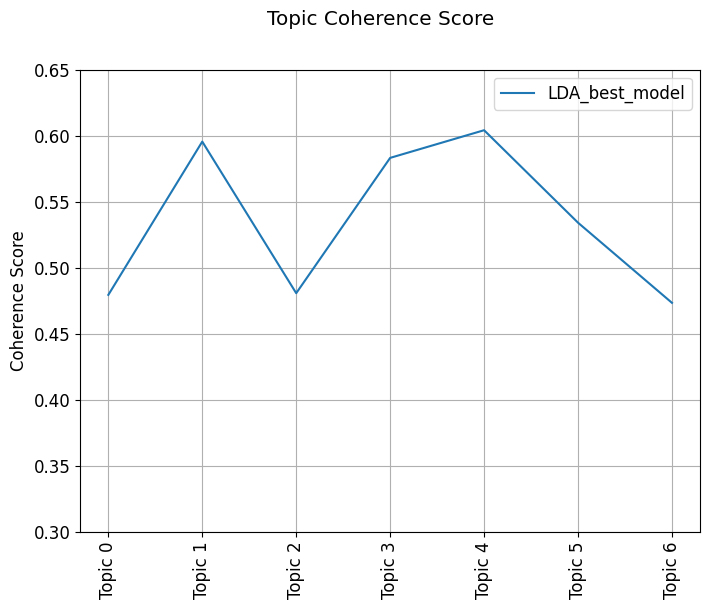

In [ ]:
# Plot graph
topicsname=[]
for i in range(0, num_topics):
    topicsname.append("Topic {0}".format(i))

plt.figure(figsize = (8,6))
plt.rcParams['font.size'] = 12
plt.plot(topicsname, topic_coherence_values, label="LDA_best_model")
plt.suptitle("Topic Coherence Score")
plt.ylabel("Coherence Score")
plt.ylim(0.3, 0.65)
plt.legend(loc='best')
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Print topic coherence scores
for i in range (0, len(topic_coherence_values)):
    tc = topic_coherence_values[i]
    print("Topic", i, ", Coherence Score =", round(tc, 4))

Topic 0 , Coherence Score = 0.4794
Topic 1 , Coherence Score = 0.5955
Topic 2 , Coherence Score = 0.4807
Topic 3 , Coherence Score = 0.5832
Topic 4 , Coherence Score = 0.6041
Topic 5 , Coherence Score = 0.534
Topic 6 , Coherence Score = 0.4733


-----

#Eksplorasi tambahan: analisis distribusi probabilitas dari top 100 words pada masing-masing topik (optional)

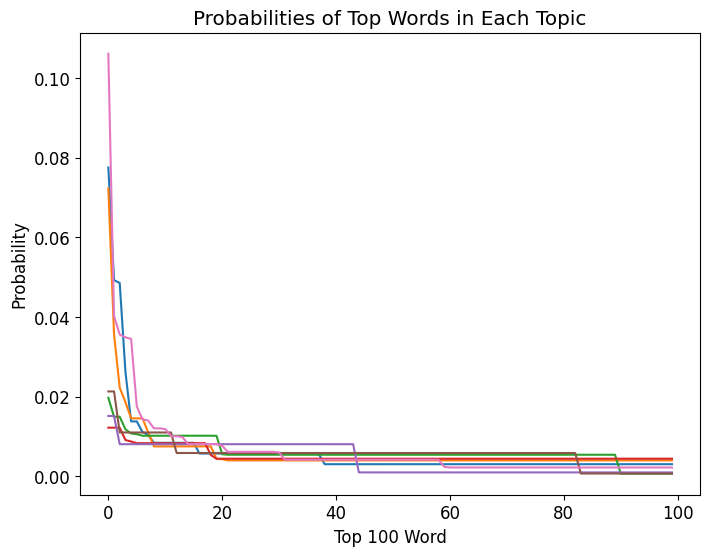

In [ ]:
# The weights of the top 100 words, sorted by size
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12

# Top 100 words by weight in each topic
top_n_words = 100
topics = select_model_lda_trigram_7.show_topics(num_topics = num_topics, num_words = top_n_words, formatted = False)

for _, infos in topics:
    probs = [prob for _, prob in infos]
    plt.plot(range(top_n_words), probs)

plt.xlabel('Top 100 Word')
plt.ylabel('Probability')
plt.title('Probabilities of Top Words in Each Topic')
plt.show()

Distribusi probabilitas masing-masing topik ditampilkan berupa garis warna. Probabilitas tertinggi terdapat pada top 10 words pada masing-masing topik, dengan grafik menurun drastis ke bawah. Berarti top 10 words ini merupakan terms paling dominan pada masing-masing topik.

-----

#Eksplorasi tambahan: cek most representative document pada tiap topik (optional)

In [ ]:
sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
   sent_topics_sorteddf = pd.concat([sent_topics_sorteddf, grp.sort_values(['Contribution'], ascending=[0]).head(1)], axis=0)

sent_topics_sorteddf.reset_index(drop=True, inplace=True)
sent_topics_sorteddf.columns = ['Topic_Number', "Contribution", "Topic_Text_Keywords", "Document_Text_Content"]
sent_topics_sorteddf

,Topic_Number,Contribution,Topic_Text_Keywords,Document_Text_Content
0,0,0.9910,"ganjar, umum, kuliah, pranowo, program_gaspol, isi, mengisi, mahasiswa, calon_presiden, jakarta","[uii, kuliah, umum, peluang, berkarir, sektor, trisakti, binus, university, sthi, jentera, stie, ykpn, yogyakarta, upn, veteran, jakarta, petra, muhammadyah]"
1,1,0.9886,"ganjar, pranowo, kuliah, umum, muda, swasta, fakultas_kedokteran, terima_kasih, ajak, politik","[tesk, baju, termahal, tesiss, argumentasi, penegas, institut_teknologi, padang, sekolah, bahasa, asing, lia, perguruan, swasta, pts, salah]"
2,2,0.9894,"karya, mode, batik_lasem, kuliah, mahasiswa, indonesia, tim, penghargaan, seoul, sama","[batik_lasem, raih, penghargaan, seoul, new, face, batik_lasem, industry, karya, tim, indonesia, menempati, posisi, pemenang, ketiga, karya, india, brasil]"
3,3,0.9896,"lukas, jenis, pendaftaran, program, kuliah, fasilitas, lengkap, hukum, pengalaman, information","[status, konservasi, formulasi, strategi, konservasi, jenis, jenis, economics, business, conference, pengarang, kiki, farida, ferine, terbitan, inv, jenis, prosiding]"
4,4,0.9890,"tpa_berhitung, bahasa_inggris, ips, osc, online, matematika, test, cek, diujikan, ipa","[materi, diujikan, online, test, osc, cek, tpa_berhitung, esa, unggul, matematika, ipa, ips, bahasa_inggris, bahasa, indonesia, bahasa_inggris, tpa, tpa_berhitung]"
5,5,0.9871,"psikologi, stunting, rahardjo, dosen, fakultas_kedokteran, membeberkan, kelor, theresia_monica, cegah, telkom_university","[rahasia, melimpah, daun, kelor, cegah, stunting, dosen, fakultas_kedokteran, theresia_monica, rahardjo, membeberkan, formula, jitu, mengatasi, stunting]"
6,6,0.9915,"ganjar, pranowo, jawa_barat, umum, kuliah, program, mahasiswa, momen, keluarga_miskin, kemiskinan","[potret_cantik, vissi, alexandra, profil, biodata, dokter, gigi, salah, klinik, gigi, ruko, paskal, jalan, pasir, kaliki, kota, menyelesaikan, pendidikan]"


_____
_____
-----
-----
-----
#SELESAI